# Cricket Player Batting Analysis

In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel("Cricket Players.xlsx",header=2)
df.head()

,Player,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 10,Opposition,Ground,Start Date,Unnamed: 14,Team
0,Virat Kohli,26*,30,21,3,1,123.8,5,not out,2,NaN,v Zimbabwe,Harare,2010-06-12,T20I # 182,India
1,Virat Kohli,DNB,-,-,-,-,-,-,-,2,NaN,v Zimbabwe,Harare,2010-06-13,T20I # 183,India
2,Virat Kohli,28,28,19,5,0,147.36,1,bowled,1,NaN,v South Africa,Durban,2011-01-09,T20I # 196,India
3,Virat Kohli,14,15,12,2,0,116.66,3,caught,1,NaN,v West Indies,Port of Spain,2011-06-04,T20I # 200,India
4,Virat Kohli,4,5,5,0,0,80,4,caught,1,NaN,v England,Manchester,2011-08-31,T20I # 204,India


In [5]:
df.shape

(7743, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7743 entries, 0 to 7742
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Player       7743 non-null   object        
 1   Runs         7743 non-null   object        
 2   Mins         7743 non-null   object        
 3   BF           7743 non-null   object        
 4   4s           7743 non-null   object        
 5   6s           7743 non-null   object        
 6   SR           7743 non-null   object        
 7   Pos          7743 non-null   object        
 8   Dismissal    7743 non-null   object        
 9   Inns         7743 non-null   int64         
 10  Unnamed: 10  0 non-null      float64       
 11  Opposition   7743 non-null   object        
 12  Ground       7743 non-null   object        
 13  Start Date   7743 non-null   datetime64[ns]
 14  Unnamed: 14  7743 non-null   object        
 15  Team         7743 non-null   object        
dtypes: dat

Here in the dataset there are some column names where missing . Rename the columns and there is a extra column in the middle where entire values are null. So we can delete the column from the dataset.

In [7]:
df.columns

Index(['Player', 'Runs', 'Mins', 'BF', '4s', '6s', 'SR', 'Pos', 'Dismissal',
       'Inns', 'Unnamed: 10', 'Opposition', 'Ground', 'Start Date',
       'Unnamed: 14', 'Team'],
      dtype='object')

In [8]:
# Rename the column 
df = df.rename({'Unnamed: 14':"Match No","4s" : "Fours", "6s" : "Sixes"},axis =1)

In [9]:
# Deleting the unwanted column
df = df.drop(["Unnamed: 10"],axis=1)

In [10]:
#Checking the null values
df.isnull().sum()

Player        0
Runs          0
Mins          0
BF            0
Fours         0
Sixes         0
SR            0
Pos           0
Dismissal     0
Inns          0
Opposition    0
Ground        0
Start Date    0
Match No      0
Team          0
dtype: int64

It is showing that there is no null values in the dataset. But there are some values are addressed with "-" values. So we can check such values.

In [11]:
df.Player.nunique()

150

In [12]:
columns = ['Player', 'Runs', 'Mins', 'BF', 'Fours', 'Sixes', 'SR', 'Pos', 'Dismissal',
       'Inns', 'Opposition', 'Ground', 'Team']
def unique_values(columns):
    for column in columns:
        print(column ," : ",df[column].unique())
        print()
        
unique_values(columns)

Player  :  ['Virat Kohli' 'Rohith Sharma' 'KL Rahul' 'S Dhawan' 'Surya Kumar Yadav'
 'Hardik Pandya' 'Sreyas Iyer' 'R Ashwin' 'R Jadeja' 'Axar Patel'
 'B Kumar' 'J Bumrah' 'Yuvendra Chahal' 'Washington Sundar' 'Ishan Kishan'
 'Aron Finch' 'David Warner' 'Glen Maxwell' 'Mathew Wade ' 'Steven Smith'
 'Adam Zampa' 'M Starc' 'MP Stoinis' 'PJ Cummins' 'M Marsh' 'JR Hazlewood'
 'KW Richardson' 'Alex Carey' 'Travis Head' 'A Agar' 'Eion Morgan'
 'Joss Buttler' 'AU Rashid' 'CJ Jordan' 'MM Ali' 'AD Hales' 'JM Bairstow'
 'JJ Roy' 'DJ Malan' 'DJ Willey' 'BA Stokes' 'SM Curran' 'Livingstone'
 'CR Woakes' 'MA Wood' 'SW Billings' 'RJW Topley' 'PD Salt' 'JC Archer'
 'Martin Guptil' 'TG Southee' 'IS Sodhi' 'KS Williamson' 'MJ Santner'
 'JDS Neesham' 'GD Phillips' 'DP Conway' 'DJ Mitchell' 'Trent Boult'
 'TL Seifert' 'AF Milne' 'MS Chapman' 'LH Ferguson' 'FH Allen'
 'TMW Latham' 'BM Tickner' 'Babar Azam' 'Shadab Khan' 'Mohammad Rizwan'
 'Fakhar Zaman' 'Imad Wasim' 'Haris Rouf' 'Mohammad Nawaz'
 'Shaheen

By analysing the each column, there are some values are missiing, some values are mixed with "*" . 
We can go through each column...

1. Runs column contains values with " * " in order to show the batsman notout. Clean such values.

2. Remove 'DNB' values which means batsman don't get a chance to bat.

3. Remove " - " values from columns like Mins,Ball Faced (BF) , Fours , Sixes , SR
 
4. Opposition column contains names of the country with some mixed values. Clean those values.


In [13]:
#Seperate the values with "*" and convert it into integer.

def convert_to_int(value):
    if isinstance(value, str) and '*' in value:
        value = int(value.replace('*', ''))
    return value

# Apply the conversion function to the 'Runs' column
df['Runs'] = df['Runs'].apply(convert_to_int)
df

,Player,Runs,Mins,BF,Fours,Sixes,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Match No,Team
0,Virat Kohli,26,30,21,3,1,123.8,5,not out,2,v Zimbabwe,Harare,2010-06-12,T20I # 182,India
1,Virat Kohli,DNB,-,-,-,-,-,-,-,2,v Zimbabwe,Harare,2010-06-13,T20I # 183,India
2,Virat Kohli,28,28,19,5,0,147.36,1,bowled,1,v South Africa,Durban,2011-01-09,T20I # 196,India
3,Virat Kohli,14,15,12,2,0,116.66,3,caught,1,v West Indies,Port of Spain,2011-06-04,T20I # 200,India
4,Virat Kohli,4,5,5,0,0,80,4,caught,1,v England,Manchester,2011-08-31,T20I # 204,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7738,Najmul Hossain,46,73,47,3,0,97.87,3,not out,2,v England,Mirpur,2023-03-12,T20I # 2023,Bangladesh
7739,Najmul Hossain,47,65,36,1,2,130.55,3,not out,1,v England,Mirpur,2023-03-14,T20I # 2026,Bangladesh
7740,Najmul Hossain,14,15,13,0,1,107.69,3,stumped,1,v Ireland,Chattogram,2023-03-27,T20I # 2034,Bangladesh
7741,Najmul Hossain,2,2,1,0,0,200,5,not out,1,v Ireland,Chattogram,2023-03-29,T20I # 2037,Bangladesh


In [14]:
#Remove the value 'DNB' from Runs column
df = df[~df["Runs"].isin(['DNB',"sub"])]

In [15]:
#Checking Unique values
df.Fours.unique()

array([3, 5, 2, 0, 11, 10, 4, 6, 8, 7, 1, 9, 12, 14, 16, 13, 15, 'ra'],
      dtype=object)

In [16]:
df[df["Fours"].isin(["ra"])]

,Player,Runs,Mins,BF,Fours,Sixes,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Match No,Team
5645,MDKJ Perera,64,53,44,ra,4,145.45,1,caught,1,v Bangladesh,Pallekele,2013-03-31,T20I # 312,Srilanka


"ra" is accidentally comes into the dataset. While refering the cricinfo ,it showed the exact value in that position. In that match MDKJ Perera Scored 64 runs by hitting 5 fours and 4 sixes. So here replacing 'ra' with 5.

In [17]:
#Replace 'ra' value
df["Fours"] = df["Fours"].replace("ra",5)

C:\Users\prana\AppData\Local\Temp/ipykernel_17856/2860095257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Fours"] = df["Fours"].replace("ra",5)


In [18]:
df[df["Fours"].isin(["ra"])]

,Player,Runs,Mins,BF,Fours,Sixes,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Match No,Team


In [19]:
# Checking missing Strike rate values.
df[df.SR.isin(["-"])]

,Player,Runs,Mins,BF,Fours,Sixes,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Match No,Team
130,Rohith Sharma,0,1,0,0,0,-,5,not out,2,v Zimbabwe,Harare,2010-06-13,T20I # 183,India
540,Sreyas Iyer,0,-,0,0,0,-,5,not out,1,v West Indies,Wankhede,2019-12-11,T20I # 1024,India
637,R Ashwin,0,4,0,0,0,-,7,not out,1,v England,Adelaide,2022-11-10,T20I # 1878,India
650,R Jadeja,0,3,0,0,0,-,7,not out,2,v England,Pune,2012-12-20,T20I # 292,India
666,R Jadeja,0,1,0,0,0,-,8,not out,1,v Bangladesh,Mirpur,2016-02-24,T20I # 509,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7598,Mohammad Saifuddin,0,1,0,0,0,-,9,not out,1,v Afghanistan,Sharjah,2022-08-30,T20I # 1753,Bangladesh
7657,Nasum Ahmed,0,5,0,0,0,-,8,not out,2,v Zimbabwe,Harare,2022-07-30,T20I # 1706,Bangladesh
7672,Shoriful Islam,0,3,0,0,0,-,11,not out,2,v Zimbabwe,Harare,2021-07-23,T20I # 1198,Bangladesh
7676,Shoriful Islam,0,1,0,0,0,-,10,not out,1,v Australia,Mirpur,2021-08-06,T20I # 1216,Bangladesh


'-' values in the SR column refers the batsman did not faced any ball. So it can remove from the dataframe

In [20]:
#Remove '-' values
df = df[~df["SR"].isin(["-"])]

In [21]:
#clean the values in column Opposition 
df.Opposition.unique()

array(['v\xa0Zimbabwe', 'v\xa0South Africa', 'v\xa0West Indies',
       'v\xa0England', 'v\xa0Australia', 'v\xa0Sri Lanka',
       'v\xa0New Zealand', 'v\xa0Afghanistan', 'v\xa0Pakistan',
       'v\xa0Bangladesh', 'v\xa0Ireland', 'v\xa0Scotland',
       'v\xa0Hong Kong', 'v\xa0Netherlands', 'v\xa0U.A.E.',
       'v\xa0Namibia', 'v\xa0India', 'v\xa0World-XI', 'v\xa0ICC World XI',
       'v\xa0Kenya', 'v\xa0Oman', 'v\xa0P.N.G.', 'v\xa0Nepal'],
      dtype=object)

In [22]:
df["Opposition"] = df["Opposition"].replace("v\xa0","",regex=True)

In [23]:
df.Opposition.unique()

array(['Zimbabwe', 'South Africa', 'West Indies', 'England', 'Australia',
       'Sri Lanka', 'New Zealand', 'Afghanistan', 'Pakistan',
       'Bangladesh', 'Ireland', 'Scotland', 'Hong Kong', 'Netherlands',
       'U.A.E.', 'Namibia', 'India', 'World-XI', 'ICC World XI', 'Kenya',
       'Oman', 'P.N.G.', 'Nepal'], dtype=object)

In [24]:
df["Mins"] = df["Mins"].replace("-",5,regex=True)

In [25]:
df.Mins.unique()

array([30, 28, 15, 5, 21, 29, 65, 67, 60, 33, 18, 61, 35, 25, 31, 26, 45,
       51, 66, 23, 75, 54, 58, 3, 71, 44, 49, 13, 85, 62, 37, 78, 63, 8,
       34, 17, 6, 19, 2, 59, 1, 16, 80, 103, 94, 20, 7, 57, 47, 74, 77,
       90, 12, 89, 56, 98, 79, 84, 36, 52, 11, 22, 9, 39, 10, 38, 48, 41,
       83, 40, 69, 87, 95, 50, 42, 46, 14, 24, 27, 70, 53, 68, 88, 72, 4,
       43, 73, 64, 82, 32, 86, 55, 76, 91, 96, 104, 97, 81, 93, 92, 106,
       102, 100, 99, 105, 101, 123, 0], dtype=object)

In [26]:
#Replace the values in the Match No and convert it into the integer
df["Match No"] = df["Match No"].replace("T20I # ","",regex=True)
df["Match No"] = df["Match No"].apply(lambda x : int(x))

In [27]:
df

,Player,Runs,Mins,BF,Fours,Sixes,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Match No,Team
0,Virat Kohli,26,30,21,3,1,123.8,5,not out,2,Zimbabwe,Harare,2010-06-12,182,India
2,Virat Kohli,28,28,19,5,0,147.36,1,bowled,1,South Africa,Durban,2011-01-09,196,India
3,Virat Kohli,14,15,12,2,0,116.66,3,caught,1,West Indies,Port of Spain,2011-06-04,200,India
4,Virat Kohli,4,5,5,0,0,80,4,caught,1,England,Manchester,2011-08-31,204,India
5,Virat Kohli,15,21,16,3,0,93.75,3,caught,1,England,Eden Gardens,2011-10-29,214,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7738,Najmul Hossain,46,73,47,3,0,97.87,3,not out,2,England,Mirpur,2023-03-12,2023,Bangladesh
7739,Najmul Hossain,47,65,36,1,2,130.55,3,not out,1,England,Mirpur,2023-03-14,2026,Bangladesh
7740,Najmul Hossain,14,15,13,0,1,107.69,3,stumped,1,Ireland,Chattogram,2023-03-27,2034,Bangladesh
7741,Najmul Hossain,2,2,1,0,0,200,5,not out,1,Ireland,Chattogram,2023-03-29,2037,Bangladesh


In [28]:
df["Opposition"] = df["Opposition"].replace({'Sri Lanka':'Srilanka','New Zealand':'Newzland'})

### Feature Engineering 

In [29]:
df_copy = df.copy()

In [30]:
# Converting notout as 1 and out as 0
mapping = {'not out': 1, 'retired notout': 1,'bowled':0, 'caught':0, 'lbw':0 ,'run out':0, 'stumped':0, 'hit wicket':0, 'obstruct field':0 }
df_copy["Dismissal"] = df_copy["Dismissal"].replace(mapping).fillna(0)
df_copy

,Player,Runs,Mins,BF,Fours,Sixes,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Match No,Team
0,Virat Kohli,26,30,21,3,1,123.8,5,1,2,Zimbabwe,Harare,2010-06-12,182,India
2,Virat Kohli,28,28,19,5,0,147.36,1,0,1,South Africa,Durban,2011-01-09,196,India
3,Virat Kohli,14,15,12,2,0,116.66,3,0,1,West Indies,Port of Spain,2011-06-04,200,India
4,Virat Kohli,4,5,5,0,0,80,4,0,1,England,Manchester,2011-08-31,204,India
5,Virat Kohli,15,21,16,3,0,93.75,3,0,1,England,Eden Gardens,2011-10-29,214,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7738,Najmul Hossain,46,73,47,3,0,97.87,3,1,2,England,Mirpur,2023-03-12,2023,Bangladesh
7739,Najmul Hossain,47,65,36,1,2,130.55,3,1,1,England,Mirpur,2023-03-14,2026,Bangladesh
7740,Najmul Hossain,14,15,13,0,1,107.69,3,0,1,Ireland,Chattogram,2023-03-27,2034,Bangladesh
7741,Najmul Hossain,2,2,1,0,0,200,5,1,1,Ireland,Chattogram,2023-03-29,2037,Bangladesh


In [31]:
df_players  = df_copy.groupby(["Player"]).agg({"Pos":"count","Runs":"sum","BF":"sum","Fours":"sum","Sixes":"sum","SR":"mean","Dismissal":"sum"})
df_players.rename(columns={"Pos":"Matches","Dismissal": "No.of Not Out"},inplace=True) 
df_players["Average"] = df_players["Runs"]/(df_players["Matches"]-df_players["No.of Not Out"])
df_players.reset_index(inplace=True)
df_players.sort_values("Runs",ascending=False)

,Player,Matches,Runs,BF,Fours,Sixes,SR,No.of Not Out,Average
145,Virat Kohli,107,4008,2905,356,117,123.425047,31,52.736842
120,Rohith Sharma,138,3843,2759,348,181,117.751594,15,31.243902
88,Martin Guptil,117,3529,2598,309,173,122.218376,7,32.081818
20,Babar Azam,97,3426,2676,366,51,109.124639,13,40.785714
11,Aron Finch,100,3083,2171,304,123,120.795300,11,34.640449
...,...,...,...,...,...,...,...,...,...
78,MA Wood,3,11,13,1,0,107.403333,3,inf
23,CBRLS Kumara,5,10,11,2,0,86.000000,2,3.333333
137,T Shamsi,11,9,24,0,0,30.302727,7,2.250000
53,J Bumrah,3,8,13,1,0,42.590000,2,8.000000


In [32]:
df_players.to_csv("Overall_stats.csv",index = False)

#### Encoding Categorical Variables 

In [33]:
df_copy.head()

,Player,Runs,Mins,BF,Fours,Sixes,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Match No,Team
0,Virat Kohli,26,30,21,3,1,123.8,5,1,2,Zimbabwe,Harare,2010-06-12,182,India
2,Virat Kohli,28,28,19,5,0,147.36,1,0,1,South Africa,Durban,2011-01-09,196,India
3,Virat Kohli,14,15,12,2,0,116.66,3,0,1,West Indies,Port of Spain,2011-06-04,200,India
4,Virat Kohli,4,5,5,0,0,80,4,0,1,England,Manchester,2011-08-31,204,India
5,Virat Kohli,15,21,16,3,0,93.75,3,0,1,England,Eden Gardens,2011-10-29,214,India


In [34]:
ground_stats=df_copy.Ground.value_counts()
ground_stats

Mirpur            388
Dubai (DSC)       331
Colombo (RPS)     261
Sydney            197
Lahore            184
                 ... 
North Sound         3
Nairobi (Gym)       3
Tolerance Oval      2
Kingstown           2
Kimberley           1
Name: Ground, Length: 96, dtype: int64

In [35]:
ground_less_than_20 = ground_stats[ground_stats<20]
ground_less_than_20.count()

28

#### Dimensionality Reduction 


Any ground having less than 20 data points should be tagged as "other" Ground. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [36]:
df_copy["Ground"]=df_copy["Ground"].apply(lambda x :'Other' if x in ground_less_than_20 else x)

In [37]:
df_copy.Ground.value_counts()

Mirpur               388
Dubai (DSC)          331
Other                329
Colombo (RPS)        261
Sydney               197
                    ... 
Dublin (Malahide)     22
The Oval              21
Chester-le-Street     21
Roseau                20
Sylhet                20
Name: Ground, Length: 69, dtype: int64

In [38]:
dummies_ground = pd.get_dummies(df_copy.Ground)
dummies_ground 

,Abu Dhabi,Adelaide,Ahmedabad,Al Amerat,Auckland,Basseterre,Belfast,Bengaluru,Birmingham,Bridgetown,...,Sharjah,Southampton,St George's,Sydney,Sylhet,The Oval,Thiruvananthapuram,Visakhapatnam,Wankhede,Wellington
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7738,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7740,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7741,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# Here Also we can apply dimensionality reduction.
oppopsition_stats = df_copy.Opposition.value_counts()
oppopsition_stats

India           716
Pakistan        607
Australia       591
Newzland        582
South Africa    556
West Indies     534
England         533
Srilanka        501
Bangladesh      291
Zimbabwe        198
Afghanistan     169
Ireland         136
Netherlands      72
Scotland         51
U.A.E.           35
Namibia          27
Oman             13
Hong Kong        11
World-XI         10
P.N.G.            9
Nepal             2
ICC World XI      1
Kenya             1
Name: Opposition, dtype: int64

In [40]:
oppopsition_stats_less_than_30 = oppopsition_stats[oppopsition_stats<50]
oppopsition_stats_less_than_30

U.A.E.          35
Namibia         27
Oman            13
Hong Kong       11
World-XI        10
P.N.G.           9
Nepal            2
ICC World XI     1
Kenya            1
Name: Opposition, dtype: int64

In [41]:
df_copy["Opposition"] = df_copy["Opposition"].apply(lambda x : 'Other_opposition' if x in oppopsition_stats_less_than_30 else x)

In [42]:
 df_copy.Opposition.value_counts()

India               716
Pakistan            607
Australia           591
Newzland            582
South Africa        556
West Indies         534
England             533
Srilanka            501
Bangladesh          291
Zimbabwe            198
Afghanistan         169
Ireland             136
Other_opposition    109
Netherlands          72
Scotland             51
Name: Opposition, dtype: int64

In [43]:
dummies_opposite = pd.get_dummies(df_copy.Opposition)
dummies_opposite

,Afghanistan,Australia,Bangladesh,England,India,Ireland,Netherlands,Newzland,Other_opposition,Pakistan,Scotland,South Africa,Srilanka,West Indies,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7738,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7739,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7740,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7741,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [44]:
player_analysis = df_copy.to_csv("Player_stats.csv",index=False)

In [45]:
dummies_player = pd.get_dummies(df_copy.Player)
dummies_player

,A Agar,A Nortje,AD Hales,AF Milne,AJ Hosein,AK Markram,AL Phehlukwayo,AU Rashid,Adam Zampa,Afif Hossain,...,TMW Latham,Taskin Ahmed,Travis Head,Trent Boult,Usman Qadir,Virat Kohli,WD Parnel,WIA Fernando,Washington Sundar,Yuvendra Chahal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7738,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7740,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7741,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Outlier Removal 

In [46]:
z_score = np.abs((df_copy.Runs-df_copy.Runs.mean())/df_copy.Runs.std())

In [47]:
threshold =3
outliers = df_copy[z_score>threshold]
outliers

,Player,Runs,Mins,BF,Fours,Sixes,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Match No,Team
30,Virat Kohli,90,71,55,9,2,163.63,3,1,1,Australia,Adelaide,2016-01-26,485,India
42,Virat Kohli,89,63,47,11,1,189.36,3,1,1,West Indies,Wankhede,2016-03-31,556,India
70,Virat Kohli,94,5,50,6,6,188,3,1,2,West Indies,Other,2019-12-06,1020,India
100,Virat Kohli,122,90,61,12,6,200,2,1,1,Afghanistan,Dubai (DSC),2022-09-08,1761,India
154,Rohith Sharma,106,79,66,12,5,160.6,1,0,1,South Africa,Dharamsala,2015-10-02,456,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6347,E Lewis,100,76,49,5,9,204.08,2,0,1,India,Lauderhill,2016-08-27,562,West Indies
6352,E Lewis,91,5,51,5,9,178.43,1,0,2,Pakistan,Other,2017-04-01,604,West Indies
6357,E Lewis,125,5,62,6,12,201.61,2,1,2,India,Kingston,2017-07-09,617,West Indies
6364,E Lewis,89,5,36,6,8,247.22,1,0,1,Bangladesh,Mirpur,2018-12-22,717,West Indies


In [48]:
player_stats = df_players[df_players["Player"].isin(["Aron Finch","Glen Maxwell"])]
player_stats

,Player,Matches,Runs,BF,Fours,Sixes,SR,No.of Not Out,Average
11,Aron Finch,100,3083,2171,304,123,120.795300,11,34.640449
41,Glen Maxwell,86,2132,1399,175,105,124.061512,12,28.810811


These 3 perfromance can be taken as a outlier because these players have an average much below what they scored in this matches. The possibility of hitting such huge runs in a matches are very but hitting 100 is possible. So we can consider it as a outilier and remove the values from dataset.

In [49]:
df_outlier= df_copy.drop(outliers.index)

<AxesSubplot:>

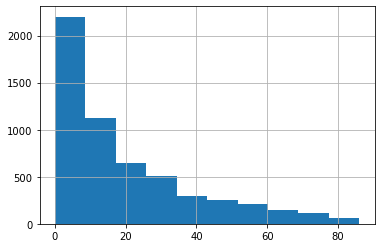

In [50]:
df_outlier["Runs"].hist()

<AxesSubplot:>

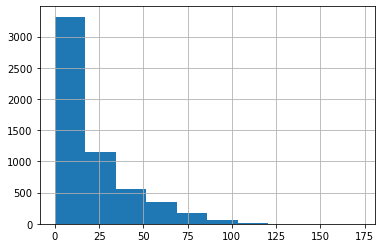

In [51]:
df_copy.Runs.hist()

In [52]:
# Q1 = df_copy["Runs"].quantile(0.25)
# Q3 = df_copy["Runs"].quantile(0.75)
# IQR = Q3 - Q1
# d = df_copy[(df_copy["Runs"]<(Q1 - IQR * 1.5) )| (df_copy["Runs"]>(Q1 + IQR * 1.5)) ]
# d.Runs.sort_values()

<AxesSubplot:>

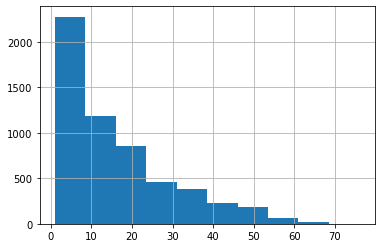

In [53]:
df_copy["BF"].hist()

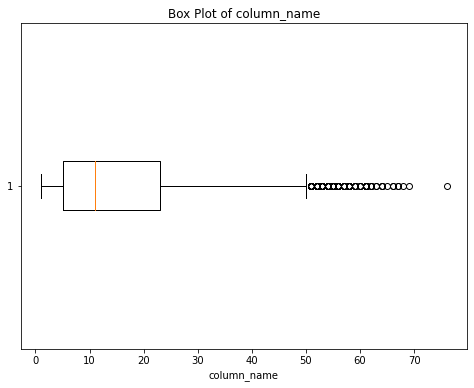

In [54]:
plt.figure(figsize=(8, 6))  # Optional: Set the figure size

# Create the box plot
plt.boxplot(df_copy["BF"], vert=False)  # 'vert=False' to create a horizontal box plot

# Add labels and title
plt.xlabel("column_name")
plt.title("Box Plot of " + "column_name")

# Show the plot
plt.show()

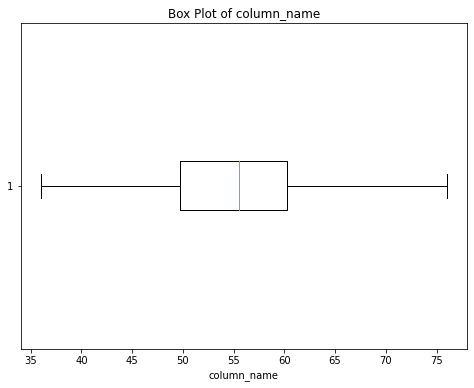

In [55]:
plt.figure(figsize=(8, 6))  # Optional: Set the figure size

# Create the box plot
plt.boxplot(outliers["BF"], vert=False)  # 'vert=False' to create a horizontal box plot

# Add labels and title
plt.xlabel("column_name")
plt.title("Box Plot of " + "column_name")

# Show the plot
plt.show()

<AxesSubplot:>

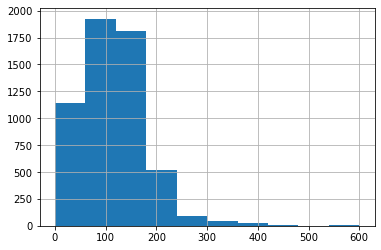

In [56]:
df_outlier["SR"].hist()

In [57]:
z_score = np.abs((df_outlier.SR-df_outlier.SR.mean())/df_outlier.SR.std())
threshold =3
outliers = df_outlier[z_score>threshold]
outliers

,Player,Runs,Mins,BF,Fours,Sixes,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Match No,Team
466,Hardik Pandya,10,3,3,1,1,333.33,4,0,1,Srilanka,Indore,2017-12-22,634,India
471,Hardik Pandya,6,3,1,0,1,600,5,1,1,Ireland,Dublin (Malahide),2018-06-27,678,India
472,Hardik Pandya,32,5,9,1,4,355.55,6,1,1,Ireland,Dublin (Malahide),2018-06-29,680,India
966,Washington Sundar,4,3,1,1,0,400,9,0,1,South Africa,Bengaluru,2019-09-22,893,India
1048,Aron Finch,20,8,5,2,2,400,5,1,2,England,Melbourne,2018-02-10,646,Australia
1364,Mathew Wade,13,9,4,1,1,325,7,1,1,Srilanka,Sydney,2022-02-13,1463,Australia
1614,MP Stoinis,59,22,18,4,6,327.77,5,1,2,Srilanka,Perth,2022-10-25,1845,Australia
1648,PJ Cummins,12,6,3,0,2,400,8,0,1,England,Dubai (DSC),2021-10-30,1379,Australia
1655,PJ Cummins,4,2,1,1,0,400,8,1,2,India,Mohali,2022-09-20,1788,Australia
1671,M Marsh,4,4,1,1,0,400,6,1,2,South Africa,Cape Town,2016-03-09,526,Australia


In [58]:
dummi = df_outlier.drop(outliers.index)
dummi.shape

(5508, 15)

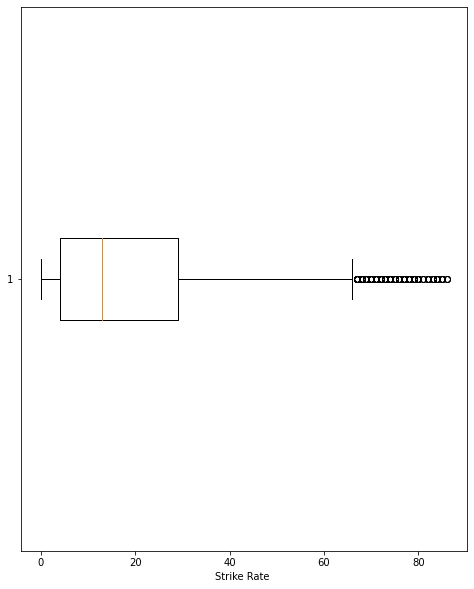

In [59]:
plt.figure(figsize=(8,10))
plt.boxplot(dummi["Runs"],vert=False)
plt.xlabel("Strike Rate ")
plt.show()

<AxesSubplot:>

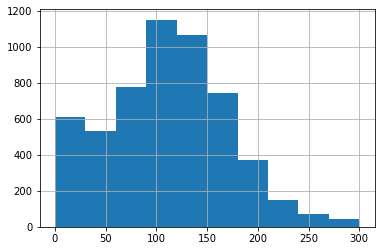

In [60]:
dummi["SR"].hist()

<AxesSubplot:>

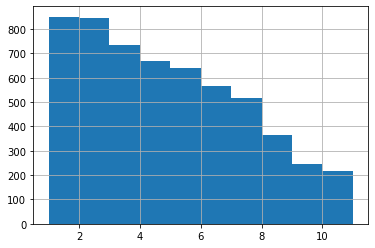

In [61]:
df_copy["Pos"].hist()

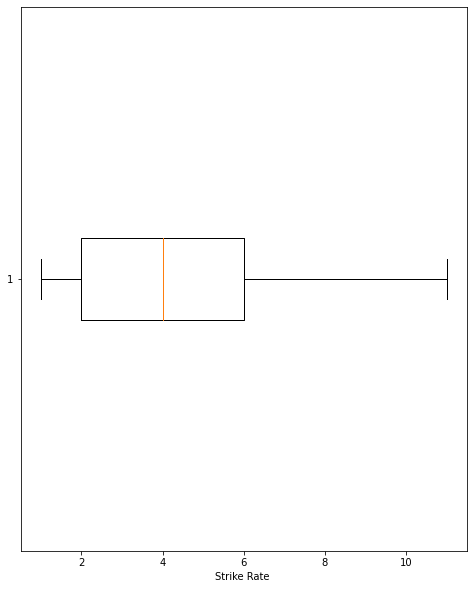

In [62]:
plt.figure(figsize=(8,10))
plt.boxplot(df_copy["Pos"],vert=False)
plt.xlabel("Strike Rate ")
plt.show()

## Feature Selection 

In [63]:
df_copy["SR"] = df_copy.SR.astype("int64")
df_copy["Runs"] = df_copy.Runs.astype("int64")
df_copy["BF"] = df_copy.BF.astype("int64")
df_copy["Pos"] = df_copy.Pos.astype("int64")
df_copy["Dismissal"] = df_copy.Dismissal.astype("int64")
df_copy["Sixes"] = df_copy.Sixes.astype("int64")
df_copy["Mins"] = df_copy.Mins.astype("int64")

In [64]:
correlation_matrix = df_copy.corr()
correlation_matrix

,Runs,Mins,BF,Fours,Sixes,SR,Pos,Dismissal,Inns,Match No
Runs,1.000000,0.735640,0.933400,0.861541,0.768665,0.488161,-0.358919,0.120089,-0.035775,-0.003476
Mins,0.735640,1.000000,0.799528,0.609066,0.460859,0.234641,-0.323415,0.067327,-0.016212,0.121806
BF,0.933400,0.799528,1.000000,0.795207,0.595738,0.300796,-0.407306,0.050814,-0.021543,-0.014449
Fours,0.861541,0.609066,0.795207,1.000000,0.466662,0.435286,-0.383233,0.061019,-0.014296,-0.024416
Sixes,0.768665,0.460859,0.595738,0.466662,1.000000,0.504874,-0.196139,0.118026,-0.039371,0.022618
SR,0.488161,0.234641,0.300796,0.435286,0.504874,1.000000,-0.055330,0.263954,-0.036851,0.012647
Pos,-0.358919,-0.323415,-0.407306,-0.383233,-0.196139,-0.055330,1.000000,0.335123,0.003746,0.045105
Dismissal,0.120089,0.067327,0.050814,0.061019,0.118026,0.263954,0.335123,1.000000,0.031353,0.032623
Inns,-0.035775,-0.016212,-0.021543,-0.014296,-0.039371,-0.036851,0.003746,0.031353,1.000000,-0.020121
Match No,-0.003476,0.121806,-0.014449,-0.024416,0.022618,0.012647,0.045105,0.032623,-0.020121,1.000000


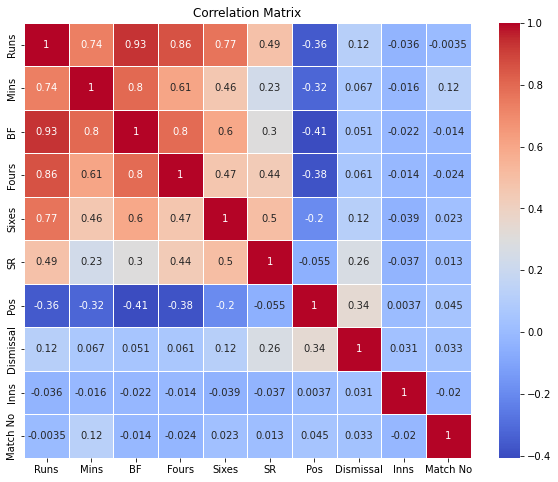

In [65]:
#Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

From the above Heatmap , we can observe that columns like BF,Fours,Sixes,SR have positive correlation with the Runs column and Inns , Match No , Dismissal have no specfic impact on that.

In [66]:

# from scipy.stats import chi2_contingency
# contingency_table = pd.crosstab(df_copy['Inns'], df_copy['Dismissal'])

# # Perform the chi-square test
# chi2_stat, p_val, dof, expected_freq = chi2_contingency(contingency_table)

# # Print the results
# print("Chi-square statistic:", chi2_stat)
# print("P-value:", p_val)
# print("Degrees of freedom:", dof)
# print("Expected frequencies:")
# print(expected_freq)

In [67]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [68]:
x = df_copy[["Mins","BF","Fours","Sixes","SR","Pos","Dismissal","Inns"]]
y = df_copy["Runs"]

In [69]:
mutual_info = mutual_info_classif(x,y)

Here we can remove  Mins , Dismissal , Inns columns from the dataset.

In [70]:

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform ANOVA using the 'ols' function from statsmodels
model = ols('Runs ~ C(Ground) + C(Pos) + C(Opposition)', data=df_copy).fit()
anova_table = sm.stats.anova_lm(model)
print(anova_table)

                   df        sum_sq       mean_sq          F         PR(>F)
C(Ground)        68.0  3.070299e+04    451.514548   1.083668   2.988900e-01
C(Pos)           10.0  3.620670e+05  36206.701722  86.898712  4.089193e-167
C(Opposition)    14.0  1.165569e+04    832.549242   1.998179   1.451582e-02
Residual       5553.0  2.313680e+06    416.654068        NaN            NaN


Position and Opposition have significant impact on the player score but Ground doesnot have much impact.

## EDA Analysis

1. Find the average of the players who played more than 30 matches.

2. Find the top 20 players who played more than 20 matches and faced more than 100 balls.

3. Top 20 Players who scored more runs in 1st and 2nd innings.

4. Team wise performance of each player.

5. Find total number of matches played in each Ground.

6. Player who hit more sixes and fours from each team.



In [71]:
Player_df = df["Player"].value_counts()
Player_df[df["Player"].value_counts()<10]

HR Walsh            9
CAK Rajitha         8
L Ngidi             8
Usman Qadir         7
Naseem Shah         7
Mohammad Hasnain    7
Shoriful Islam      7
BC Fortuin          7
KA Maharaj          6
JR Hazlewood        6
KW Richardson       6
LH Ferguson         6
CBRLS Kumara        5
RJW Topley          5
Yuvendra Chahal     4
BM Tickner          4
J Bumrah            3
MA Wood             3
JC Archer           3
Name: Player, dtype: int64

These players are actually bowlers , so they are occassionally batting in the match. However there are importance in the analysis. So we kept them in our dataset.

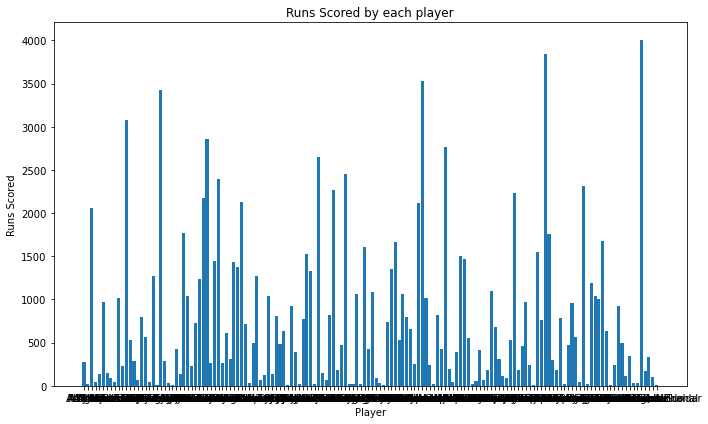

In [72]:
#Runs scored by each player
plt.figure(figsize=(10, 6))
plt.bar(df_players['Player'], df_players['Runs'])
plt.xlabel('Player')
plt.ylabel('Runs Scored')
plt.title('Runs Scored by each player')
 # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

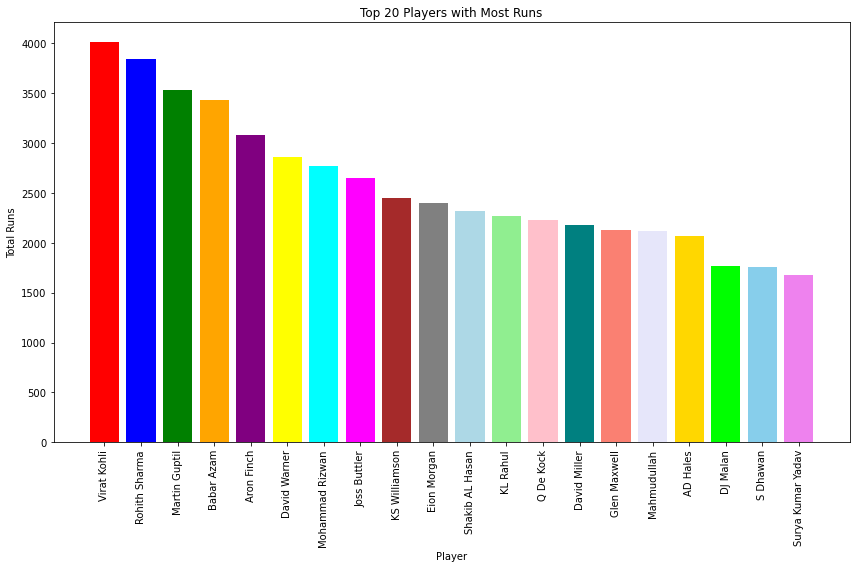

In [73]:
sorted_df = df_players.sort_values(by='Runs', ascending=False)

# Select the top 20 players with the most runs
top_20_players = sorted_df.head(20)

colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'brown', 'gray',
          'lightblue', 'lightgreen', 'pink', 'teal', 'salmon', 'lavender', 'gold', 'lime', 'skyblue', 'violet']
# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(top_20_players['Player'], top_20_players['Runs'],color =colors)
plt.xlabel('Player')
plt.ylabel('Total Runs')
plt.title('Top 20 Players with Most Runs')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

Virat kohli, Rohith Sharma  are the recent high score players in world cricket.

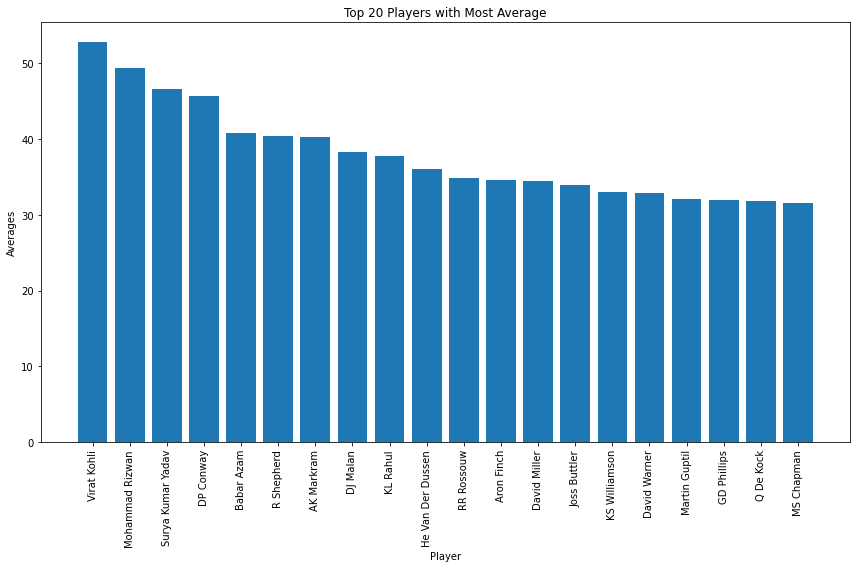

In [74]:
# AVerage of top 20 Players
sorted_df = df_players[df_players["Matches"] > 10]
sorted_df = sorted_df.sort_values("Average",ascending=False)
top_20_averages = sorted_df.head(20)
plt.figure(figsize=(12, 8))
plt.bar(top_20_averages['Player'], top_20_averages['Average'])
plt.xlabel('Player')
plt.ylabel('Averages')
plt.title('Top 20 Players with Most Average')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

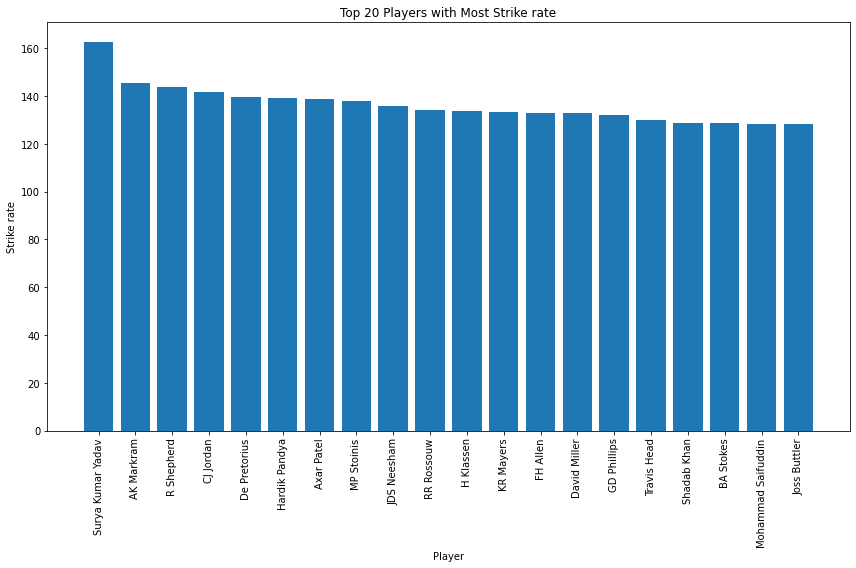

In [75]:
# Strike Rate of top 20 Players
sorted_df = df_players[df_players["BF"] > 100]
sorted_df = sorted_df.sort_values("SR",ascending=False)
top_20_SR = sorted_df.head(20)
plt.figure(figsize=(12, 8))
plt.bar(top_20_SR['Player'], top_20_SR['SR'])
plt.xlabel('Player')
plt.ylabel('Strike rate')
plt.title('Top 20 Players with Most Strike rate')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

 <b>Surya Kumar Yadav </b> has the highest Strike rate(More than 160). Other players in the above graph have SR almost near to the 140 . Ie similar.

In [76]:
df[df["Player"].isin(top_20_SR["Player"])]["Pos"].value_counts()

5     185
6     161
4     133
7      72
2      71
8      55
3      53
1      43
9      23
10      5
Name: Pos, dtype: int64


Here, players who have high strike rate are mostly who batted in middle order position. <b>No of players,who batted in the 4,6,5 positions have higher strike rate than who batted on the other positions.<b/>

In [77]:
df[df["Pos"] == 10 ].groupby(["Player"]).agg({"SR":"mean","Runs":"sum"}).sort_values("SR",ascending=False)

,SR,Runs
Player,,
Shaheen Shah Afridi,200.000000,10
CBRLS Kumara,200.000000,4
Usman Qadir,190.000000,22
Hassan Ali,170.833333,20
Shadab Khan,162.500000,10
R Ashwin,154.540000,17
AJ Hosein,143.750000,48
CJ Jordan,142.855000,8
Naseem Shah,137.500000,18


In [78]:
df[df["Player"]=="Mohammad Saifuddin"].groupby(["Pos"]).agg({"SR":"mean","Runs":"sum","BF":"sum"})

,SR,Runs,BF
Pos,,,
7,119.835000,59,48
8,143.588571,87,77
9,118.432500,48,46
10,120.000000,6,5


In [79]:
#Position vs Runs scored
player_pos_df = df.groupby(["Pos","Player"]).agg({"Player":"count","Runs":"sum","SR":"mean"}).sort_values("Runs",ascending=False)

In [80]:
for pos, group in player_pos_df.groupby('Pos'):
    print(f"Position: {pos}")
    print(group)
    print("\n")

Position: 1
                        Player  Runs          SR
Pos Player                                      
1   Mohammad Rizwan         57  2566  112.537193
    Rohith Sharma           79  2455  123.511772
    Martin Guptil           80  2427  126.911375
    David Warner            61  1698  121.931311
    JJ Roy                  63  1490  117.668413
    KL Rahul                36  1178  116.812222
    Q De Kock               39  1042  113.556410
    P Nissanka              36   966   88.340833
    Aron Finch              26   898  125.435000
    MDKJ Perera             26   703  125.911538
    Fakhar Zaman            25   647  127.098000
    Litton Das              22   564  119.723182
    Mohammad Naim           25   553   82.542800
    Babar Azam              13   511  115.557692
    MD Gunathilaka          25   511  119.341600
    BA King                 19   485  118.663684
    Joss Buttler            11   460  131.967273
    J Charles               22   446   89.079545
    RR H

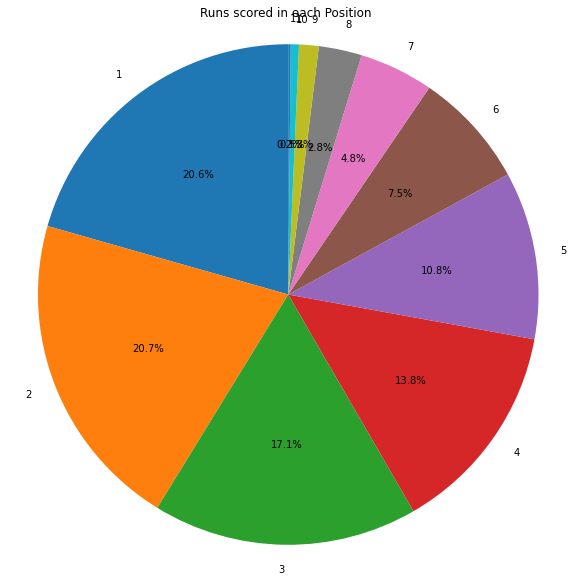

In [81]:
position_runs = player_pos_df.groupby('Pos')['Runs'].sum()

# Plotting the pie chart
plt.figure(figsize=(10, 10))
plt.pie(position_runs, labels=position_runs.index, autopct='%1.1f%%', startangle=90)
plt.title('Runs scored in each Position')
plt.axis('equal') 
plt.show()

Here we calculated the total runs scored by the each players and divide them based on the runs scored by each position batsman.

<b>From the above Pie chart , It is very clear that position of a player have huge impact on the runs they scored. It is because top order and middle order batsman get more balls to play but it also describes his ability to score from that playing position.

In [82]:
#boundaries per balls

df_players["Four_percentage"] = df_players["Fours"]/df_players["BF"]
df_players["Six_percentage"] = df_players["Sixes"]/df_players["BF"]

In [83]:
df_players

,Player,Matches,Runs,BF,Fours,Sixes,SR,No.of Not Out,Average,Four_percentage,Six_percentage
0,A Agar,28,277,273,19,9,86.921429,5,12.043478,0.069597,0.032967
1,A Nortje,11,16,34,1,0,64.695455,5,2.666667,0.029412,0.000000
2,AD Hales,72,2063,1489,225,69,119.755694,6,31.257576,0.151108,0.046340
3,AF Milne,13,45,49,1,2,80.693846,8,9.000000,0.020408,0.040816
4,AJ Hosein,14,132,115,8,7,95.272143,7,18.857143,0.069565,0.060870
...,...,...,...,...,...,...,...,...,...,...,...
145,Virat Kohli,107,4008,2905,356,117,123.425047,31,52.736842,0.122547,0.040275
146,WD Parnel,21,174,180,13,4,96.846667,11,17.400000,0.072222,0.022222
147,WIA Fernando,31,337,358,26,7,80.766129,2,11.620690,0.072626,0.019553
148,Washington Sundar,13,107,70,10,6,129.718462,3,10.700000,0.142857,0.085714


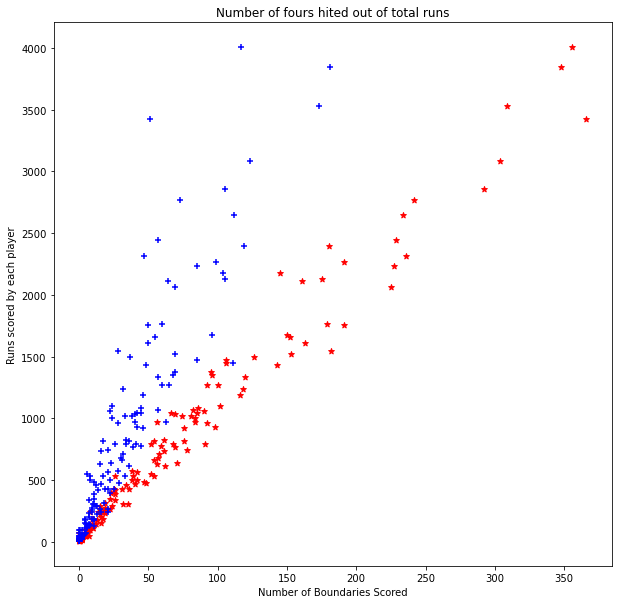

In [84]:
plt.figure(figsize=(10, 10))
plt.scatter(df_players["Fours"],df_players["Runs"],color ="Red",marker="*" )
plt.title("Number of fours hited out of total runs")
plt.scatter(df_players["Sixes"],df_players["Runs"],color ="Blue",marker="+" )
plt.title("Number of fours hited out of total runs")
plt.xlabel("Number of Boundaries Scored")
plt.ylabel("Runs scored by each player")
plt.show()

From the above chart, boundaries have positive relationship with the Runs scored by each player. By calculatiing the boundary/Ball faced by each player , we can find out the runs scored through boundaries.

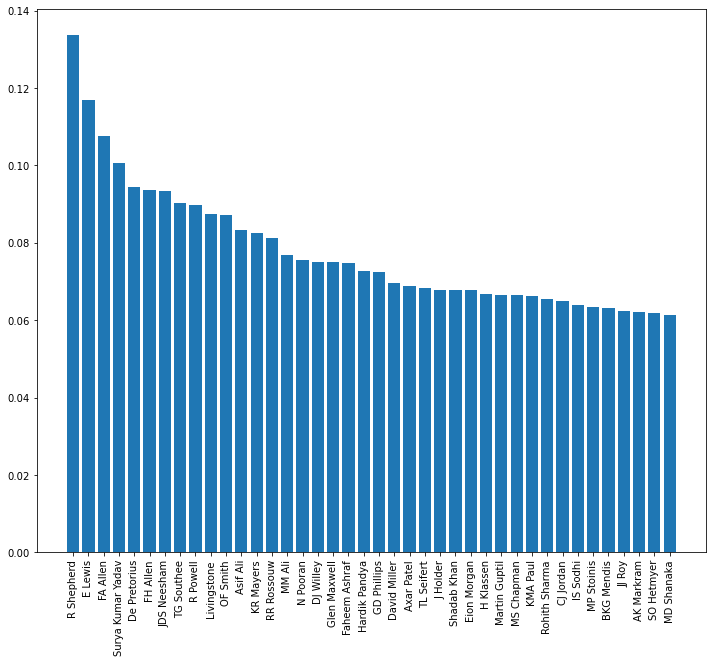

In [85]:
sorted_df = df_players[df_players["BF"] > 100]
top_30_boundrypercent = sorted_df.sort_values("Six_percentage",ascending=False).head(40)
plt.figure(figsize=(12,10))
plt.bar(top_30_boundrypercent["Player"],top_30_boundrypercent["Six_percentage"])
plt.xticks(rotation=90) 
plt.show()

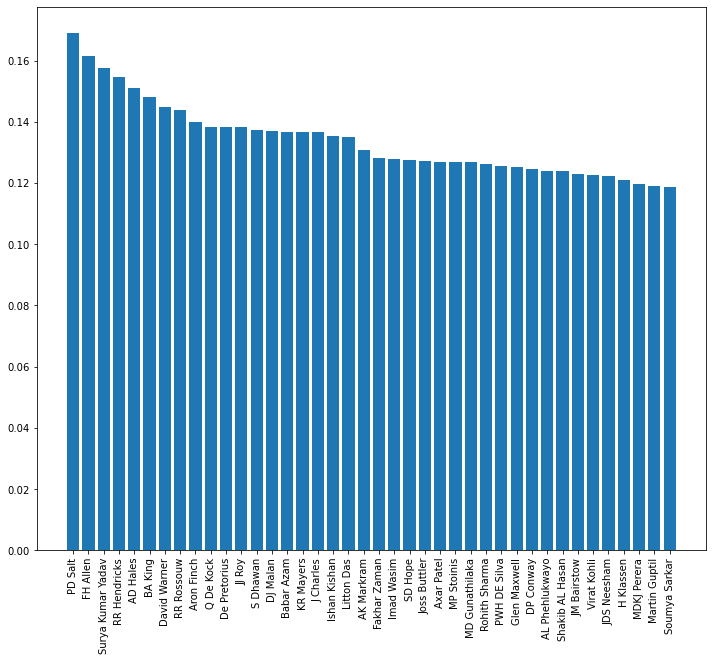

In [86]:
sorted_df = df_players[df_players["BF"] > 100]
top_30_boundrypercent = sorted_df.sort_values("Four_percentage",ascending=False).head(40)
plt.figure(figsize=(12,10))
plt.bar(top_30_boundrypercent["Player"],top_30_boundrypercent["Four_percentage"])
plt.xticks(rotation=90) 
plt.show()

Here most of the middle order players have the most boundary percentage. i.e the probablity of hitting boadaries per balls is more in middle order batsman .


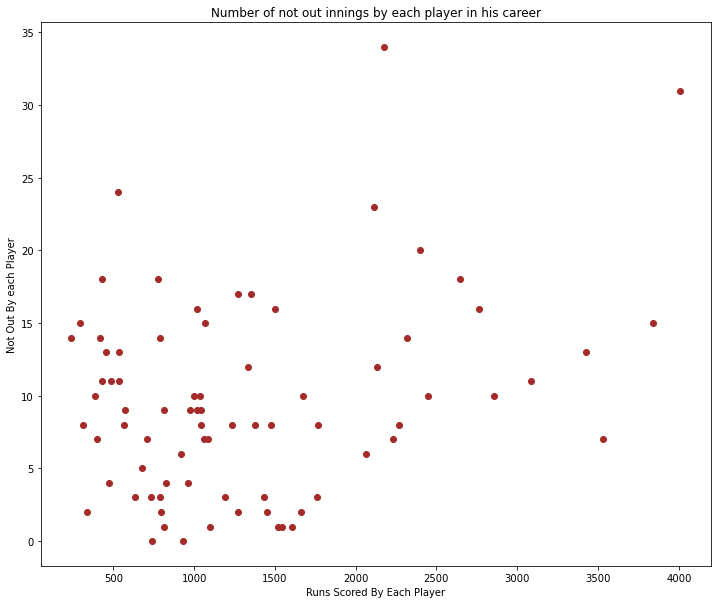

In [87]:
sorted_df = df_players[df_players["Matches"] > 30]
plt.figure(figsize=(12,10))
plt.scatter(sorted_df["Runs"],sorted_df["No.of Not Out"],color = "Brown",marker= "o")
plt.xlabel("Runs Scored By Each Player")
plt.ylabel("Not Out By each Player")
plt.title("Number of not out innings by each player in his career")
plt.show()

The column no of not out have no particular effect on the runs scored by the player

In [88]:
#player performance in each innings
inns_performance = df.groupby(["Inns","Player"]).agg({"Player":"count","Runs":"sum","SR":"mean"})
for inns, group in inns_performance.groupby('Inns'):
    print(f"Innings: {inns}")
    print(group)
    print("\n")

Innings: 1
                        Player  Runs          SR
Inns Player                                     
1    A Agar                  9    81  102.547778
     A Nortje                5     4   33.332000
     AD Hales               34   850  110.493824
     AF Milne                6    21   89.085000
     AJ Hosein               3    39   85.750000
...                        ...   ...         ...
     Virat Kohli            62  2025  116.629194
     WD Parnel              12    97  104.480833
     WIA Fernando           16   203   80.770000
     Washington Sundar       9    32  124.444444
     Yuvendra Chahal         3     4   66.666667

[150 rows x 3 columns]


Innings: 2
                        Player  Runs          SR
Inns Player                                     
2    A Agar                 19   196   79.519474
     A Nortje                6    12   90.831667
     AD Hales               38  1213  128.042632
     AF Milne                7    24   73.501429
     AJ Hosein       

Innings have impact on the scoring runs and strike rate . Most of the players have more strike rate while chasing than the First batting. So most batsman tried to hard hit the ball while chasing.

In [89]:
# Match versus Ground
ground_performance_df = df.groupby(["Ground"]).agg({"Ground":'count',"Runs":"sum"})

Grounds = ['Abu Dhabi', 'Adelaide', 'Ahmedabad', 'Al Amerat', 'Auckland',
       'Basseterre', 'Belfast', 'Bengaluru', 'Birmingham', 'Bloemfontein',
       'Bridgetown', 'Brisbane', 'Bristol', 'Bulawayo', 'Canberra',
       'Cape Town', 'Cardiff', 'Carrara', 'Centurion', 'Chattogram', 'Chennai',
       'Chester-le-Street', 'Christchurch', 'Colombo (RPS)', 'Coolidge',
       'Cuttack', 'Dehradun', 'Delhi', 'Dharamsala', 'Dubai (DSC)',
       'Dublin (Malahide)', 'Dunedin', 'Durban', 'East London', 'Eden Gardens',
       'Edinburgh', 'Geelong', 'Gqeberha', 'Gros Islet', 'Guwahati',
       'Hambantota', 'Hamilton', 'Harare', 'Hobart', 'Hyderabad', 'Indore',
       'Jaipur', 'Johannesburg', 'Kanpur', 'Karachi', 'Khulna', 'Kimberley',
       'Kingston', 'Kingstown', 'Lahore', 'Lauderhill', 'Leeds', 'Lord''s',
       'Lucknow', 'Manchester', 'Melbourne', 'Mirpur', 'Mohali',
       'Mount Maunganui', 'Nagpur', 'Nairobi (Gym)', 'Napier', 'Nelson',
       'North Sound', 'Nottingham', 'Paarl', 'Pallekele', 'Perth',
       'Port of Spain', 'Potchefstroom', 'Providence', 'Pune', 'Queenstown',
       'Rajkot', 'Ranchi', 'Rawalpindi', 'Roseau', 'Sharjah', 'Southampton',
       'St George''s', 'Sydney', 'Sylhet', 'Tarouba', 'Taunton', 'The Hague',
       'The Oval', 'Thiruvananthapuram', 'Tolerance Oval', 'Visakhapatnam',
       'Wankhede', 'Wellington']
ground_performance_df["Grounds"]  = Grounds
ground_performance_df.rename(columns = {"Ground":"Matches"},inplace=True)
ground_performance_df = ground_performance_df.reset_index(drop=True)
ground_performance_df.index = range(1, len(ground_performance_df) + 1)
ground_performance_df.sort_values("Matches")

,Matches,Runs,Grounds
52,1,25,Kimberley
93,2,19,Tolerance Oval
54,2,1,Kingstown
69,3,69,North Sound
66,3,12,Nairobi (Gym)
...,...,...,...
55,184,3560,Lahore
86,197,3925,Sydney
24,261,5013,Colombo (RPS)
30,331,6694,Dubai (DSC)


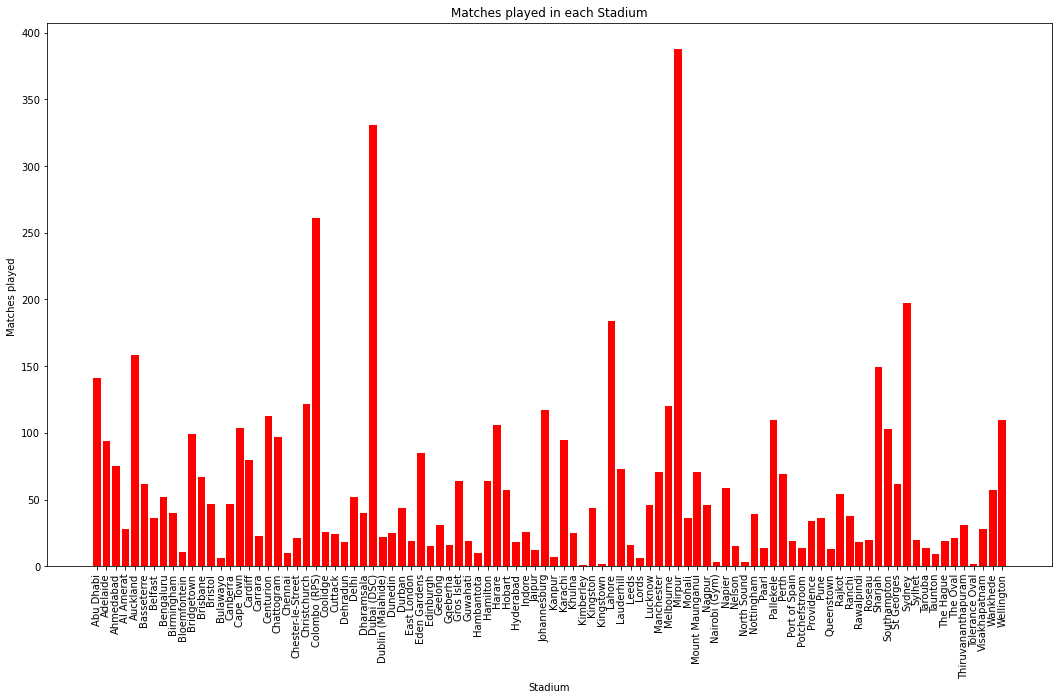

In [90]:
#Matches in each Stadium
plt.figure(figsize=(18,10))
plt.bar(ground_performance_df["Grounds"],ground_performance_df["Matches"],color = "Red")
plt.xticks(rotation=90) 
plt.xlabel("Stadium")
plt.ylabel("Matches played ")
plt.title("Matches played in each Stadium")
plt.show()

There are few matches played in some Grounds ,here we can remove those entries from the dataset because the players who played in that stadium are very few players. Or we can keep data in order to analyze the player perfromance against the opponent teams.

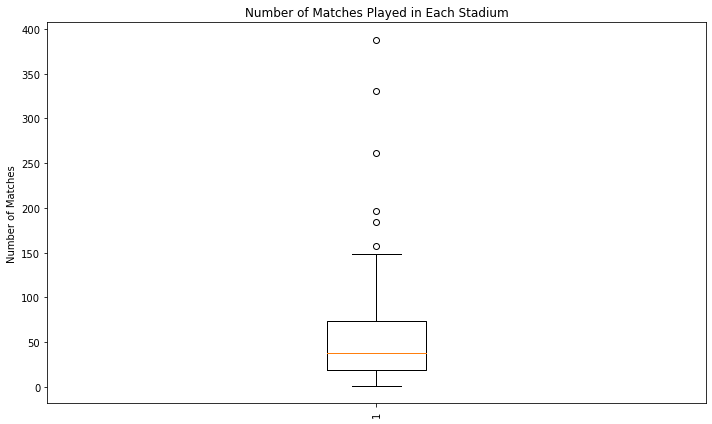

In [91]:
plt.figure(figsize=(10, 6))
plt.boxplot(df["Ground"].value_counts())
plt.ylabel('Number of Matches')
plt.title('Number of Matches Played in Each Stadium')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

In [92]:
# Match versus Ground
team_performance_df = df.groupby(["Opposition"]).agg({"Player":'count',"Runs":"sum"})

teams = ['Zimbabwe', 'South Africa', 'West Indies', 'England', 'Australia',
       'Sri Lanka', 'New Zealand', 'Afghanistan', 'Pakistan',
       'Bangladesh', 'Ireland', 'Scotland', 'Hong Kong', 'Netherlands',
       'U.A.E.', 'Namibia', 'India', 'World-XI', 'ICC World XI', 'Kenya',
       'Oman', 'P.N.G.', 'Nepal']
team_performance_df["Teams"]  = teams
team_performance_df = team_performance_df.reset_index(drop=True)
team_performance_df.index = range(1, len(team_performance_df) + 1)
team_performance_df

,Player,Runs,Teams
1,169,3152,Zimbabwe
2,591,11289,South Africa
3,291,7008,West Indies
4,533,11242,England
5,11,385,Australia
6,1,58,Sri Lanka
7,716,14025,New Zealand
8,136,3057,Afghanistan
9,1,2,Pakistan
10,27,642,Bangladesh


In [93]:
df.Opposition.unique()

array(['Zimbabwe', 'South Africa', 'West Indies', 'England', 'Australia',
       'Srilanka', 'Newzland', 'Afghanistan', 'Pakistan', 'Bangladesh',
       'Ireland', 'Scotland', 'Hong Kong', 'Netherlands', 'U.A.E.',
       'Namibia', 'India', 'World-XI', 'ICC World XI', 'Kenya', 'Oman',
       'P.N.G.', 'Nepal'], dtype=object)

In [94]:
player_runs_against_team = df.groupby(['Player', 'Opposition'])['Runs'].sum().reset_index()

player_runs_against_team.sort_values("Runs",ascending=False)


,Player,Opposition,Runs
1325,Virat Kohli,Australia,794
1114,Rohith Sharma,West Indies,683
293,David Warner,Srilanka,653
1327,Virat Kohli,England,639
93,Aron Finch,England,619
...,...,...,...
642,Litton Das,Australia,0
889,Mosaddek Hossain,South Africa,0
166,BKG Mendis,Pakistan,0
1081,RJW Topley,Pakistan,0


In [95]:

Virat_df = player_runs_against_team[player_runs_against_team["Player"]=="Virat Kohli"]
Virat_df

,Player,Opposition,Runs
1324,Virat Kohli,Afghanistan,172
1325,Virat Kohli,Australia,794
1326,Virat Kohli,Bangladesh,193
1327,Virat Kohli,England,639
1328,Virat Kohli,Hong Kong,59
1329,Virat Kohli,Ireland,9
1330,Virat Kohli,Netherlands,62
1331,Virat Kohli,Newzland,311
1332,Virat Kohli,Pakistan,488
1333,Virat Kohli,Scotland,2


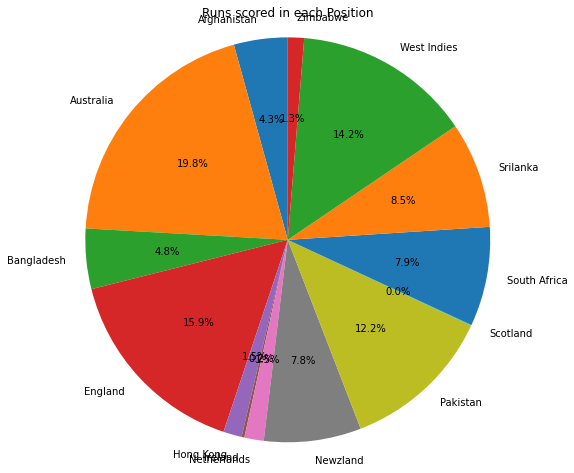

In [96]:

position_runs = Virat_df.groupby('Opposition')['Runs'].sum()
plt.figure(figsize=(8, 8))
plt.pie(position_runs, labels=position_runs.index, autopct='%1.1f%%', startangle=90)
plt.title('Runs scored in each Position')
plt.axis('equal') 
plt.show()

Player performance against each country is very important because their average performance against each country can be taken from this analysis.

From the above analysis there are some columns that are not relevant for our model building that are...

1. Mins - The time spend by the each player in the crease is not important in scoring runs. Because batsman may be on the non-striker end but yet the time is calculate there. So we can remove the Mins column

2. Match no ,  Dismissal,Match date are also not important.

In [97]:
df_copy.to_csv("df_average.csv",index = False)

# Data Modeling

### Input with Outliers


In [98]:
df_dummies = pd.concat([df_copy,dummies_player,dummies_opposite,dummies_ground],axis='columns')
df_dummies.head()

,Player,Runs,Mins,BF,Fours,Sixes,SR,Pos,Dismissal,Inns,...,Sharjah,Southampton,St George's,Sydney,Sylhet,The Oval,Thiruvananthapuram,Visakhapatnam,Wankhede,Wellington
0,Virat Kohli,26,30,21,3,1,123,5,1,2,...,0,0,0,0,0,0,0,0,0,0
2,Virat Kohli,28,28,19,5,0,147,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Virat Kohli,14,15,12,2,0,116,3,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Virat Kohli,4,5,5,0,0,80,4,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Virat Kohli,15,21,16,3,0,93,3,0,1,...,0,0,0,0,0,0,0,0,0,0


In [99]:
df_final = df_dummies.drop(["Player","Dismissal","Inns","Match No","Team","Start Date","Mins"],axis =1)
df_final

,Runs,BF,Fours,Sixes,SR,Pos,Opposition,Ground,A Agar,A Nortje,...,Sharjah,Southampton,St George's,Sydney,Sylhet,The Oval,Thiruvananthapuram,Visakhapatnam,Wankhede,Wellington
0,26,21,3,1,123,5,Zimbabwe,Harare,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28,19,5,0,147,1,South Africa,Durban,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14,12,2,0,116,3,West Indies,Other,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,5,0,0,80,4,England,Manchester,0,0,...,0,0,0,0,0,0,0,0,0,0
5,15,16,3,0,93,3,England,Eden Gardens,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7738,46,47,3,0,97,3,England,Mirpur,0,0,...,0,0,0,0,0,0,0,0,0,0
7739,47,36,1,2,130,3,England,Mirpur,0,0,...,0,0,0,0,0,0,0,0,0,0
7740,14,13,0,1,107,3,Ireland,Chattogram,0,0,...,0,0,0,0,0,0,0,0,0,0
7741,2,1,0,0,200,5,Ireland,Chattogram,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
df_final.shape

(5646, 242)

In [101]:
##Data Splitiing

x = df_final.drop("Runs",axis=1)
y = df_final.Runs
print(x.shape)
print(y.shape)

(5646, 241)
(5646,)


In [102]:
 x = x.drop(["Opposition","Ground"],axis = 1)

In [103]:
x

,BF,Fours,Sixes,SR,Pos,A Agar,A Nortje,AD Hales,AF Milne,AJ Hosein,...,Sharjah,Southampton,St George's,Sydney,Sylhet,The Oval,Thiruvananthapuram,Visakhapatnam,Wankhede,Wellington
0,21,3,1,123,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,19,5,0,147,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12,2,0,116,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,80,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,16,3,0,93,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7738,47,3,0,97,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7739,36,1,2,130,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7740,13,0,1,107,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7741,1,0,0,200,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)
x_train.shape

(4516, 239)

In [105]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)

In [106]:
# Evaluation 
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score,mean_absolute_error

# R-squared (Coefficient of Determination)
r2_score_value = r2_score(y_test, lr_pred)
print("r2 score :",r2_score_value)

# Mean Squared Error (MSE)
mse_value = mean_squared_error(y_test, lr_pred)
print("mse_value",mse_value)

r2 score : 0.9851517242211816
mse_value 7.255750651064172


In [107]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf',epsilon=0.2,C=1.0)
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)
r2_score(y_test,y_pred)

0.9783358675307111

In [108]:
mse = mean_squared_error(y_test, svr.predict(x_test))
mae = mean_absolute_error(y_test, svr.predict(x_test))
r2 = r2_score(y_test, svr.predict(x_test))

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 10.586383605093086
Mean Absolute Error: 1.148729095615215
R-squared: 0.9783358675307111


In [109]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
rf= RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

mse = mean_squared_error(y_test, rf.predict(x_test))
mae = mean_absolute_error(y_test, rf.predict(x_test))
r2 = r2_score(y_test, rf.predict(x_test))

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

cv = ShuffleSplit(n_splits=10,test_size=0.2,random_state=42)

print()
print(cross_val_score(RandomForestRegressor(),x_train,y_train,cv=cv))


Mean Squared Error: 0.45084823008849595
Mean Absolute Error: 0.26889380530973456
R-squared: 0.9990773774931524

[0.99729025 0.99147553 0.9958593  0.99581879 0.99575797 0.99726772
 0.99821479 0.99836091 0.99746174 0.99893332]


### Prediction Using player values 

In [110]:
column_names = x.columns
len(x.columns)

239

In [111]:
location = "Southampton"
loc_index = np.where(x.columns==location)[0][0]
loc_index

230

In [112]:
def predict_run(location,BF,Fours,Sixes,SR,Pos,Opposition,Player):    
    loc_index_ground = np.where(x.columns==location)[0][0]
    loc_index_Player = np.where(x.columns==Player)[0][0]
    loc_index_Opposition = np.where(x.columns==Opposition)[0][0]
    
    predict_column = np.zeros(len(x.columns))
    
    predict_column[0] = BF
    predict_column[1] = Fours
    predict_column[2] = Sixes
    predict_column[3] = SR
    predict_column[4] = Pos
    
    if loc_index_ground >= 0:
        predict_column[loc_index_ground] = 1
        predict_column[loc_index_Opposition] = 1
        predict_column[loc_index_Player] = 1
    print("Runs  predicted  by lr  :",lr.predict([predict_column])[0]) 
    print("Runs predicted by SVR : ",svr.predict([predict_column])[0])
    print("Runs predicted by RF : ",rf.predict([predict_column])[0]) 
    print("Runs predicted by GB : ",svr.predict([predict_column])[0]) 
    return 
location = "Other"
BF = 12
Fours = 2
Sixes = 0
SR = 116
Pos = 3
Opposition = "West Indies"
Player = "Virat Kohli"
predict_run(location,BF,Fours,Sixes,SR,Pos,Opposition,Player)

Runs  predicted  by lr  : 16.1038818359375
Runs predicted by SVR :  13.924754326465337
Runs predicted by RF :  14.05
Runs predicted by GB :  13.924754326465337


In [113]:
df_copy[df_copy.index ==3]

,Player,Runs,Mins,BF,Fours,Sixes,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Match No,Team
3,Virat Kohli,14,15,12,2,0,116,3,0,1,West Indies,Other,2011-06-04,200,India


In [114]:
def predict_run(location,BF,Fours,Sixes,SR,Pos,Opposition,Player):    
    loc_index_ground = np.where(x.columns==location)[0][0]
    loc_index_Player = np.where(x.columns==Player)[0][0]
    loc_index_Opposition = np.where(x.columns==Opposition)[0][0]
    
    predict_column = np.zeros(len(x.columns))
    
    predict_column[0] = BF
    predict_column[1] = Fours
    predict_column[2] = Sixes
    predict_column[3] = SR
    predict_column[4] = Pos
    
    if loc_index_ground >= 0:
        predict_column[loc_index_ground] = 1
        predict_column[loc_index_Opposition] = 1
        predict_column[loc_index_Player] = 1
    print("Runs  lr- ",lr.predict([predict_column])[0]) 
    print("Runs SVR- ",svr.predict([predict_column])[0]) 
    print("Runs RF- ",rf.predict([predict_column])[0])
    return 
location = "Mirpur"
BF = 10
Fours = 0
Sixes = 2
SR = 200
Pos = 5
Opposition = "West Indies"
Player = "Aron Finch"
predict_run(location,BF,Fours,Sixes,SR,Pos,Opposition,Player)

Runs  lr-  17.37896728515625
Runs SVR-  21.343913656959554
Runs RF-  19.26


### Checking the feature importance 

In [115]:
feature_importances = rf.feature_importances_
feature_names = x.columns

In [116]:
feature_importance_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)


top_10_features = dict(sorted_feature_importance[:10])
print("Top 10 Features:")
for feature, importance in top_10_features.items():
    print(f"{feature}: {importance}")

Top 10 Features:
BF: 0.8528910202001828
SR: 0.1394088208012634
Sixes: 0.00497230162761116
Fours: 0.000967705729965378
Aron Finch: 0.000394126948116566
Pos: 0.00019085780419351447
Zimbabwe: 5.7788881200974165e-05
Harare: 5.475734062009992e-05
England: 4.492476034126744e-05
Srilanka: 4.4474251526426485e-05


Here BF is the important feature and sixes ,fours, SR has no such importance

### Creating dictionary to find Average Performance of Player 

In [117]:
grouped_data = df_copy.groupby(['Player', 'Opposition'])

# Calculate the average strike rate for each group
average_performance = grouped_data['BF',"SR"].mean().reset_index()
print(average_performance)

                 Player    Opposition         BF          SR
0                A Agar    Bangladesh  11.000000   52.000000
1                A Agar       England  16.200000  108.800000
2                A Agar      Newzland   6.166667   68.833333
3                A Agar      Pakistan  12.666667  106.333333
4                A Agar  South Africa   5.000000  114.000000
...                 ...           ...        ...         ...
1319  Washington Sundar  South Africa   1.000000  400.000000
1320  Washington Sundar      Srilanka   1.000000    0.000000
1321  Washington Sundar   West Indies   3.000000   80.000000
1322    Yuvendra Chahal     Australia   3.000000   75.000000
1323    Yuvendra Chahal      Newzland   2.500000   41.500000

[1324 rows x 4 columns]


C:\Users\prana\AppData\Local\Temp/ipykernel_17856/1065511562.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  average_performance = grouped_data['BF',"SR"].mean().reset_index()


In [118]:
# Player average perfromance agianstthe opponent and in Ground
player_avg_performance = average_performance.groupby('Player').apply(lambda x: dict(zip(x['Opposition'],zip(x['SR'],x['BF'])))).to_dict()
player_avg_performance

{'A Agar': {'Bangladesh': (52.0, 11.0),
  'England': (108.8, 16.2),
  'Newzland': (68.83333333333333, 6.166666666666667),
  'Pakistan': (106.33333333333333, 12.666666666666666),
  'South Africa': (114.0, 5.0),
  'Srilanka': (95.75, 11.75),
  'West Indies': (60.0, 3.0),
  'Zimbabwe': (100.0, 5.0)},
 'A Nortje': {'Australia': (49.5, 4.5),
  'India': (41.666666666666664, 2.3333333333333335),
  'Netherlands': (400.0, 1.0),
  'Pakistan': (20.0, 5.0),
  'West Indies': (16.5, 3.0)},
 'AD Hales': {'Afghanistan': (104.5, 23.5),
  'Australia': (121.45454545454545, 19.09090909090909),
  'India': (99.6, 24.6),
  'Ireland': (140.0, 5.0),
  'Netherlands': (70.0, 17.0),
  'Newzland': (118.0, 19.818181818181817),
  'Pakistan': (119.7, 14.0),
  'South Africa': (153.71428571428572, 19.714285714285715),
  'Srilanka': (115.0, 24.5),
  'West Indies': (121.76923076923077, 24.692307692307693)},
 'AF Milne': {'Australia': (100.0, 2.0),
  'India': (90.25, 4.0),
  'Pakistan': (67.0, 4.25),
  'South Africa': (12

In [119]:
# Player average perfromance . If the player is not played against that opponent or in that ground
avg_perfromance =  df_copy.groupby(["Player"]).agg({"SR":"mean","BF":"mean"}).reset_index
                                                   
avg_perfromance("Player")

,Player,SR,BF
0,A Agar,86.750000,9.750000
1,A Nortje,64.545455,3.090909
2,AD Hales,119.375000,20.680556
3,AF Milne,80.461538,3.769231
4,AJ Hosein,95.071429,8.214286
...,...,...,...
145,Virat Kohli,123.000000,27.149533
146,WD Parnel,96.571429,8.571429
147,WIA Fernando,80.516129,11.548387
148,Washington Sundar,129.615385,5.384615


In [120]:
avg_performance_dict = pd.DataFrame(avg_perfromance("Player"))
avg_performance_dict.set_index("Player",inplace=True)
avg_performance_dict = avg_performance_dict.to_dict(orient='index')
avg_performance_dict

{'A Agar': {'SR': 86.75, 'BF': 9.75},
 'A Nortje': {'SR': 64.54545454545455, 'BF': 3.090909090909091},
 'AD Hales': {'SR': 119.375, 'BF': 20.680555555555557},
 'AF Milne': {'SR': 80.46153846153847, 'BF': 3.769230769230769},
 'AJ Hosein': {'SR': 95.07142857142857, 'BF': 8.214285714285714},
 'AK Markram': {'SR': 145.3, 'BF': 21.433333333333334},
 'AL Phehlukwayo': {'SR': 87.95238095238095, 'BF': 6.142857142857143},
 'AU Rashid': {'SR': 83.46153846153847, 'BF': 4.153846153846154},
 'Adam Zampa': {'SR': 81.64285714285714, 'BF': 4.142857142857143},
 'Afif Hossain': {'SR': 102.10714285714286, 'BF': 15.107142857142858},
 'Alex Carey': {'SR': 86.45833333333333, 'BF': 8.708333333333334},
 'Aron Finch': {'SR': 120.41, 'BF': 21.71},
 'Asif Ali': {'SR': 116.75, 'BF': 8.25},
 'Axar Patel': {'SR': 138.625, 'BF': 7.875},
 'B Kumar': {'SR': 79.3157894736842, 'BF': 4.947368421052632},
 'BA King': {'SR': 115.65625, 'BF': 19.1875},
 'BA Stokes': {'SR': 128.28571428571428, 'BF': 12.771428571428572},
 'BC 

In [121]:
avg_performance_dict["A Agar"]["BF"]

9.75

In [122]:
#Finding the player perfromance based on the ground and Opponent
Player_Opponent_Ground= df_copy[ (df_copy["Opposition"] == "South Africa")& ((df_copy["Ground"]=="Durban")&(df_copy["Player"]=="Virat Kohli"))]["BF"].mean()
Player_Opponent_Ground

19.0

###  Removing the Fours and Sixes with keeping the outliers

In [123]:
# Removing the Fours and the sixes from the above table  and  do the analysis again.

x = df_final.drop(["Ground","Runs","Opposition","Fours","Sixes"],axis =1)

y = df_final["Runs"]


In [124]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state=42)


In [125]:
#linear regression
lr1 = LinearRegression()
lr1.fit(x_train,y_train)
lr1_pred = lr1.predict(x_test)
print("mse - ",mean_squared_error(lr1_pred,y_test))
print("r squared",r2_score(lr1_pred,y_test))

mse -  42.431346695317735
r squared 0.901086221694842


In [126]:
#svr
svr1 = SVR(kernel='rbf',epsilon=0.2,C=1.0)
svr1.fit(x_train,y_train)
svr1_pred = svr1.predict(x_test)

print("mse - ",mean_squared_error(svr1_pred,y_test))
print("r squared",r2_score(svr1_pred,y_test))

mse -  22.201244060085557
r squared 0.9414446504741572


In [127]:
#random forest
rf1 = RandomForestRegressor(n_estimators=100,random_state=42)
rf1.fit(x_train,y_train)
rf1_pred = rf1.predict(x_test)
print("mse - ",mean_squared_error(rf1_pred,y_test))
print("r squared",r2_score(rf1_pred,y_test))

mse -  1.6886638134592689
r squared 0.9963994069586677


In [128]:
from sklearn.ensemble import GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.2, random_state=42)
gb_regressor.fit(x_train, y_train)


y_pred = gb_regressor.predict(x_test)
print(mean_squared_error(y_test, y_pred))
r2_score(y_test, y_pred)

1.3165228378076659


0.9973034376206878

In [129]:
def predict_run(location,BF,SR,Pos,Opposition,Player):    
    loc_index_ground = np.where(x.columns==location)[0][0]
    loc_index_Player = np.where(x.columns==Player)[0][0]
    loc_index_Opposition = np.where(x.columns==Opposition)[0][0]
    
    predict_column = np.zeros(len(x.columns))
    
    predict_column[0] = BF
    predict_column[1] = SR
    predict_column[2] = Pos
    
    if loc_index_ground >= 0:
        predict_column[loc_index_ground] = 1
        predict_column[loc_index_Opposition] = 1
        predict_column[loc_index_Player] = 1
    print("Runs  lr- ",lr1.predict([predict_column])[0]) 
    print("Runs SVR- ",svr1.predict([predict_column])[0]) 
    print("Runs RF- ",rf1.predict([predict_column])[0])
    return lr1.predict([predict_column])[0]
location = "Mirpur"
BF = 10
SR = 100
Pos = 10
Opposition = "West Indies"
Player = "Virat Kohli"
predict_run(location,BF,SR,Pos,Opposition,Player)

Runs  lr-  8.974490437968797
Runs SVR-  9.720065751507752
Runs RF-  9.82


8.974490437968797

In [130]:
player_list = [ 'KL Rahul','Rohith Sharma','Virat Kohli','Surya Kumar Yadav','Hardik Pandya', 'Sreyas Iyer',
               'Axar Patel','B Kumar'  , 'J Bumrah', 'Yuvendra Chahal'
              ]
location = "Wankhede"
Opposition = "Australia"
runs = 0
Total_balls = 0
wickets =0
for Player in player_list:
    if Player in player_avg_performance and Opposition in player_avg_performance[Player]:
        SR = player_avg_performance[Player][Opposition][0]
        BF_1 = np.round(player_avg_performance[Player][Opposition][1])
        print(Player)
        print(SR)
        print(BF_1)

        
    else:
        SR = avg_performance_dict[Player]["SR"]
        BF_1 = np.round(avg_performance_dict[Player]["BF"])
        print(Player)
        print(SR)
        print(BF_1)
    Pos = player_list.index(Player) + 1
    if (Total_balls + BF_1 )<= 120 :
        Total_balls = Total_balls + BF_1
        wickets +=1
        print("Total Balls : ",Total_balls)
        runs += predict_run(location,BF_1,SR,Pos,Opposition,Player)
    else:
        if 120 - Total_balls == 0:
            break
        else:
            
            BF_1 = 120 - Total_balls
            print(Player)
            print(BF_1)
            wickets +=1
            runs += predict_run(location,BF_1,SR,Pos,Opposition,Player)
            Total_balls = Total_balls + BF_1
            break
print("Runs Scored By Team India based on the Average performance of each Player against Australia : ",np.round(runs), "with in ",Total_balls," Balls loosing ",wickets," Wickets")
        

KL Rahul
110.7
20.0
Total Balls :  20.0
Runs  lr-  28.68063166785727
Runs SVR-  22.344380434219808
Runs RF-  22.1
Rohith Sharma
124.05263157894737
15.0
Total Balls :  35.0
Runs  lr-  22.710779469420523
Runs SVR-  18.777297875155284
Runs RF-  18.24
Virat Kohli
126.38095238095238
26.0
Total Balls :  61.0
Runs  lr-  37.15437619589467
Runs SVR-  33.161927306440916
Runs RF-  33.07
Surya Kumar Yadav
125.0
21.0
Total Balls :  82.0
Runs  lr-  36.03486684452441
Runs SVR-  26.436841376451298
Runs RF-  26.13
Hardik Pandya
149.85714285714286
18.0
Total Balls :  100.0
Runs  lr-  28.284144337347712
Runs SVR-  27.037458348673578
Runs RF-  26.62
Sreyas Iyer
120.0
3.0
Total Balls :  103.0
Runs  lr-  5.249693088509321
Runs SVR-  3.76156531537009
Runs RF-  4.07
Axar Patel
120.0
5.0
Total Balls :  108.0
Runs  lr-  8.714798394993927
Runs SVR-  6.041547526831458
Runs RF-  6.0
B Kumar
38.666666666666664
3.0
Total Balls :  111.0
Runs  lr-  -0.808259803017731
Runs SVR-  1.1557155132535755
Runs RF-  1.34
J Bumr

### Removing the Strike Rate , Fours , Sixes with Outliers Included

In [131]:

x = df_final.drop(["Ground","Runs","Opposition","SR","Fours","Sixes"],axis =1)
y = df_final["Runs"]
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state=42)


In [132]:
#linear regression
lr_wo_sr = LinearRegression()
lr_wo_sr.fit(x_train,y_train)
lr_wo_sr_pred = lr_wo_sr.predict(x_test)
print("mse - ",mean_squared_error(lr_wo_sr_pred,y_test))
print("r squared",r2_score(lr_wo_sr_pred,y_test))

mse -  65.29902335422453
r squared 0.8422745672106348


In [133]:
#svr
svr_wo_sr = SVR(kernel='rbf',epsilon=0.2,C=1.0)
svr_wo_sr.fit(x_train,y_train)
svr_wo_sr_pred = svr_wo_sr.predict(x_test)

print("mse - ",mean_squared_error(svr_wo_sr_pred,y_test))
print("r squared",r2_score(svr_wo_sr_pred,y_test))

mse -  77.48403314255046
r squared 0.7916753326913905


In [134]:
#random forest
rf_wo_sr = RandomForestRegressor(n_estimators=100,random_state=42)
rf_wo_sr.fit(x_train,y_train)
rf_wo_sr_pred = rf_wo_sr.predict(x_test)
print("mse - ",mean_squared_error(rf_wo_sr_pred,y_test))
print("r squared",r2_score(rf_wo_sr_pred,y_test))

mse -  70.07681024453956
r squared 0.8241202580698175


In [135]:
from sklearn.ensemble import GradientBoostingRegressor
gb_regressor_wo_sr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.2, random_state=42)
gb_regressor_wo_sr.fit(x_train, y_train)


y_pred_wo_sr = gb_regressor_wo_sr.predict(x_test)
print(mean_squared_error(y_test, y_pred_wo_sr))
r2_score(y_test, y_pred_wo_sr)

62.568263654897024


0.8718448164624021

In [136]:
x.columns

Index(['BF', 'Pos', 'A Agar', 'A Nortje', 'AD Hales', 'AF Milne', 'AJ Hosein',
       'AK Markram', 'AL Phehlukwayo', 'AU Rashid',
       ...
       'Sharjah', 'Southampton', 'St George's', 'Sydney', 'Sylhet', 'The Oval',
       'Thiruvananthapuram', 'Visakhapatnam', 'Wankhede', 'Wellington'],
      dtype='object', length=236)

In [137]:
#checking the accuracy after removal of the strike rate

def predict_run(location,BF,Pos,Opposition,Player):    
    loc_index_ground = np.where(x.columns==location)[0][0]
    loc_index_Player = np.where(x.columns==Player)[0][0]
    loc_index_Opposition = np.where(x.columns==Opposition)[0][0]
    
    predict_column = np.zeros(len(x.columns))
    
    predict_column[0] = BF
    predict_column[1] = Pos
    
    if loc_index_ground >= 0:
        predict_column[loc_index_ground] = 1
        predict_column[loc_index_Opposition] = 1
        predict_column[loc_index_Player] = 1
    print("Runs  lr without SR- ",lr_wo_sr.predict([predict_column])[0]) 
    print("Runs SVR without SR : ",svr_wo_sr.predict([predict_column])[0]) 
    print("Runs RF without SR :",rf_wo_sr.predict([predict_column])[0])
    print("Runs GB  without SR : ",gb_regressor_wo_sr.predict([predict_column])[0])
    return gb_regressor_wo_sr.predict([predict_column])[0]



player_list = [ 'KL Rahul','Rohith Sharma','Virat Kohli','Sreyas Iyer','Hardik Pandya','Surya Kumar Yadav' ,
               'Axar Patel','B Kumar'  , 'J Bumrah', 'Yuvendra Chahal'
              ]
location = "Mirpur"
Opposition = "Australia"
runs = 0
Total_balls = 0
wickets =0
for Player in player_list:
    
    BF_1 = np.round(df_copy[ (df_copy["Opposition"] == Opposition)& ((df_copy["Ground"]== location)&(df_copy["Player"]== Player))]["BF"].mean())
    if BF_1 is np.nan:
        if Player in player_avg_performance and Opposition in player_avg_performance[Player]:
            BF_1 = np.round(player_avg_performance[Player][Opposition][1])
            
        
        else:
            BF_1 = np.round(avg_performance_dict[Player]["BF"])

    BF_1 = np.round(player_avg_performance[Player][Opposition][1])
    
    print("Player Name : ",Player)
    Pos = player_list.index(Player) + 1
    if (Total_balls + BF_1 )<= 120 :
        Total_balls = Total_balls + BF_1
        wickets +=1
        print("Total Balls : ",Total_balls)
        print("Number of Balls faced by the Player ",BF_1)
        
        runs += predict_run(location,BF_1,Pos,Opposition,Player)
    else:
        if 120 - Total_balls == 0:
            break
        else:
            
            BF_1 = 120 - Total_balls
            print("Number of Balls faced by the Player ",BF_1)
            
            wickets +=1
            runs += predict_run(location,BF_1,Pos,Opposition,Player)
            Total_balls = Total_balls + BF_1
            break
    print()
    print()
print("Runs Scored By Team India based on the Average performance of each Player against Opponent : ",np.round(runs), "with in ",Total_balls," Balls loosing ",wickets," Wickets")
        

Player Name :  KL Rahul
Total Balls :  20.0
Number of Balls faced by the Player  20.0
Runs  lr without SR-  24.505585072772025
Runs SVR without SR :  24.441874007248003
Runs RF without SR : 19.79
Runs GB  without SR :  23.135561218063568


Player Name :  Rohith Sharma
Total Balls :  35.0
Number of Balls faced by the Player  15.0
Runs  lr without SR-  17.527597786666398
Runs SVR without SR :  17.38973751798238
Runs RF without SR : 17.9
Runs GB  without SR :  15.466447147241356


Player Name :  Virat Kohli
Total Balls :  61.0
Number of Balls faced by the Player  26.0
Runs  lr without SR-  32.42466504118532
Runs SVR without SR :  33.182053232572905
Runs RF without SR : 26.92
Runs GB  without SR :  32.535423582301355


Player Name :  Sreyas Iyer
Total Balls :  64.0
Number of Balls faced by the Player  3.0
Runs  lr without SR-  -0.7687193742410487
Runs SVR without SR :  1.4491464994521976
Runs RF without SR : 0.67
Runs GB  without SR :  0.7147543782256066


Player Name :  Hardik Pandya
Tota

###  After removing the outlier 

In [138]:
#checking the accuracy after removal of the strike rate
def team_score(player_list,location,Opposition):
    def predict_run(location,BF,Pos,Opposition,Player):    
        loc_index_ground = np.where(x.columns==location)[0][0]
        loc_index_Player = np.where(x.columns==Player)[0][0]
        loc_index_Opposition = np.where(x.columns==Opposition)[0][0]

        predict_column = np.zeros(len(x.columns))

        predict_column[0] = BF
        predict_column[1] = Pos

        if loc_index_ground >= 0:
            predict_column[loc_index_ground] = 1
            predict_column[loc_index_Opposition] = 1
            predict_column[loc_index_Player] = 1
        print("Runs predicted by lr without SR- ",lr_wo_sr.predict([predict_column])[0]) 
        print("Runs predicted by SVR without SR : ",svr_wo_sr.predict([predict_column])[0]) 
        print("Runs predicted by RF without SR :",rf_wo_sr.predict([predict_column])[0])
        print("Runs predicted by GB  without SR : ",gb_regressor_wo_sr.predict([predict_column])[0])
        return gb_regressor_wo_sr.predict([predict_column])[0]


    print(location)
    runs = 0
    Total_balls = 0
    wickets =0
    for Player in player_list:

        BF_1 = np.round(df_copy[ (df_copy["Opposition"] == Opposition)& ((df_copy["Ground"]== location)&(df_copy["Player"]== Player))]["BF"].mean())
        if BF_1 is np.nan:
            if Player in player_avg_performance and Opposition in player_avg_performance[Player]:
                BF_1 = np.round(player_avg_performance[Player][Opposition][1])


            else:
                BF_1 = np.round(avg_performance_dict[Player]["BF"])

        BF_1 = np.round(player_avg_performance[Player][Opposition][1])

        print("Player Name : ",Player)
        Pos = player_list.index(Player) + 1
        if (Total_balls + BF_1 )<= 120 :
            Total_balls = Total_balls + BF_1
            wickets +=1
            print("Total Balls : ",Total_balls)
            print("Number of Balls faced by the Player ",BF_1)

            runs += predict_run(location,BF_1,Pos,Opposition,Player)
        else:
            if 120 - Total_balls == 0:
                break
            else:

                BF_1 = 120 - Total_balls
                print("Number of Balls faced by the Player ",BF_1)

                wickets +=1
                runs += predict_run(location,BF_1,Pos,Opposition,Player)
                Total_balls = Total_balls + BF_1
                break
        print()
        print()
    print("Runs Scored By Team India based on the Average performance of each Player against Australia : ",np.round(runs), "with in ",Total_balls," Balls loosing ",wickets," Wickets")

player_list = ['Martin Guptil','DP Conway'  ,'KS Williamson', 'FH Allen', 'GD Phillips' ,'DJ Mitchell' , 
               'MJ Santner','Trent Boult', 'MS Chapman', 'LH Ferguson' ,'TG Southee']
location = "Wankhede"
Opposition = "India"
team_score(player_list,location,Opposition)

Wankhede
Player Name :  Martin Guptil
Total Balls :  18.0
Number of Balls faced by the Player  18.0
Runs predicted by lr without SR-  25.903692946883368
Runs predicted by SVR without SR :  21.804614632720494
Runs predicted by RF without SR : 21.96
Runs predicted by GB  without SR :  26.163997673424728


Player Name :  DP Conway
Total Balls :  39.0
Number of Balls faced by the Player  21.0
Runs predicted by lr without SR-  27.990275856229896
Runs predicted by SVR without SR :  26.13314352803443
Runs predicted by RF without SR : 25.74
Runs predicted by GB  without SR :  28.100713745698876


Player Name :  KS Williamson
Total Balls :  64.0
Number of Balls faced by the Player  25.0
Runs predicted by lr without SR-  32.63604591498566
Runs predicted by SVR without SR :  31.923095196575986
Runs predicted by RF without SR : 39.85
Runs predicted by GB  without SR :  33.006975130789904


Player Name :  FH Allen
Total Balls :  73.0
Number of Balls faced by the Player  9.0
Runs predicted by lr wit

In [139]:
#checking the accuracy after removal of the strike rate
def team_score(player_list,location,Opposition):
    def predict_run(location,BF,Pos,Opposition,Player):    
        loc_index_ground = np.where(x.columns==location)[0][0]
        loc_index_Player = np.where(x.columns==Player)[0][0]
        loc_index_Opposition = np.where(x.columns==Opposition)[0][0]

        predict_column = np.zeros(len(x.columns))

        predict_column[0] = BF
        predict_column[1] = Pos

        if loc_index_ground >= 0:
            predict_column[loc_index_ground] = 1
            predict_column[loc_index_Opposition] = 1
            predict_column[loc_index_Player] = 1
        print("Runs predicted by lr without SR- ",lr_wo_sr.predict([predict_column])[0]) 
        print("Runs predicted by SVR without SR : ",svr_wo_sr.predict([predict_column])[0]) 
        print("Runs predicted by RF without SR :",rf_wo_sr.predict([predict_column])[0])
        print("Runs predicted by GB  without SR : ",gb_regressor_wo_sr.predict([predict_column])[0])
        return gb_regressor_wo_sr.predict([predict_column])[0]


    print(location)
    runs = 0
    Total_balls = 0
    wickets =0
    for Player in player_list:

        BF_1 = np.round(df_copy[ (df_copy["Opposition"] == Opposition)& ((df_copy["Ground"]== location)&(df_copy["Player"]== Player))]["BF"].mean())
        if BF_1 is np.nan:
            if Player in player_avg_performance and Opposition in player_avg_performance[Player]:
                BF_1 = np.round(player_avg_performance[Player][Opposition][1])


            else:
                BF_1 = np.round(avg_performance_dict[Player]["BF"])

        BF_1 = np.round(player_avg_performance[Player][Opposition][1])

        print("Player Name : ",Player)
        Pos = player_list.index(Player) + 1
        if (Total_balls + BF_1 )<= 120 :
            Total_balls = Total_balls + BF_1
            wickets +=1
            print("Total Balls : ",Total_balls)
            print("Number of Balls faced by the Player ",BF_1)

            runs += predict_run(location,BF_1,Pos,Opposition,Player)
        else:
            if 120 - Total_balls == 0:
                break
            else:

                BF_1 = 120 - Total_balls
                print("Number of Balls faced by the Player ",BF_1)

                wickets +=1
                runs += predict_run(location,BF_1,Pos,Opposition,Player)
                Total_balls = Total_balls + BF_1
                break
        print()
        print()
    print("Runs Scored By Team India based on the Average performance of each Player against Australia : ",np.round(runs), "with in ",Total_balls," Balls loosing ",wickets," Wickets")

player_list = ['Q De Kock','David Miller','H Klassen','WD Parnel','RR Hendricks','AK Markram']
location = "Johannesburg"
Opposition = "West Indies"
team_score(player_list,location,Opposition)

Johannesburg
Player Name :  Q De Kock
Total Balls :  32.0
Number of Balls faced by the Player  32.0
Runs predicted by lr without SR-  47.26091533520189
Runs predicted by SVR without SR :  42.94616343801437
Runs predicted by RF without SR : 46.49
Runs predicted by GB  without SR :  45.929837938587966


Player Name :  David Miller
Total Balls :  46.0
Number of Balls faced by the Player  14.0
Runs predicted by lr without SR-  22.57486931116296
Runs predicted by SVR without SR :  16.324991399704746
Runs predicted by RF without SR : 18.78
Runs predicted by GB  without SR :  19.143309714180262


Player Name :  H Klassen
Total Balls :  53.0
Number of Balls faced by the Player  7.0
Runs predicted by lr without SR-  11.82074477253137
Runs predicted by SVR without SR :  6.3598736294932685
Runs predicted by RF without SR : 5.81
Runs predicted by GB  without SR :  8.764480497099433


Player Name :  WD Parnel
Total Balls :  57.0
Number of Balls faced by the Player  4.0
Runs predicted by lr without 

In [140]:
import pickle
with open('score_prediction_model.pickle','wb') as f:
    pickle.dump(gb_regressor_wo_sr,f)

In [141]:
import json
columns = {
    'data_columns' : [col for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

with open('avg_performance_team.json', 'w') as f:
    json.dump(player_avg_performance, f)
    
with open('total_avg_performance.json', 'w') as f:
    json.dump(avg_performance_dict, f)    


In [143]:
import sklearn

print(sklearn.__version__)

0.24.2


In [144]:
import sys

print(sys.version)


3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
